In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
from zipfile import ZipFile
from shapely.geometry import Point
import datetime
import geopandas as gpd
from PIL import Image
from io import BytesIO

define fig size

In [2]:
cm = 1/2.54
x_width= 16.5*cm
y_width= 18.0*cm
y_width

7.086614173228346

income, population, events, exposed population

single event
time series, capital stock, income, consumption, consumption sm,  well-being

multi event
time series, capital stock, income, consumption, consumption sm,  well-being

In [3]:
shape_path = '/home/insauer/mnt/pikhome/hhwb_backup/data/shapes/phl_adm_psa_namria_20200529_shp/phl_admbnda_adm1_psa_namria_20200529.shp'
prvS = gpd.GeoDataFrame()
prvS = gpd.read_file(shape_path)

In [4]:
REGION_DICT = {15: 'PH150000000', #7, 16, 17
                14: 'PH140000000',#7, 16, 17
                13: 'PH130000000',#7, 16, 17
                1: 'PH010000000', #16, 17
                2: 'PH020000000', #7,9,16,17,22
                3: 'PH030000000', #7,16
                41: 'PH040000000', #7,16,17
                42: 'PH170000000', #7,16,17
                9: 'PH090000000', #7,17
                5: 'PH050000000', #7, 16, 17
                6: 'PH060000000', #7, 16, 17
                7: 'PH070000000', #7, 17
                8: 'PH080000000', #7, 16, 17
                10: 'PH100000000',#7, 16, 17
                11: 'PH110000000',#7,9,16,17,22
                12: 'PH120000000',
                16: 'PH160000000'} #7, 16, 17

In [5]:
xtick_weeks=[50,100,150,200,250,300]
start_days = datetime.datetime.strptime("2002-01-01","%Y-%m-%d")
xticks=[]
xticks.append('')
for week in xtick_weeks:
    threeWeeks = datetime.timedelta(weeks = week)
    xticks.append(str(start_days  + threeWeeks)[:-9])
xticks.append('')
xticks

['',
 '2002-12-17',
 '2003-12-02',
 '2004-11-16',
 '2005-11-01',
 '2006-10-17',
 '2007-10-02',
 '']

# Figure 3

In [6]:
cm = 1/2.54
x_width= 11.4*cm
y_width= 16*cm
x_width

4.488188976377953

In [7]:
gov = pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/gov_data_mean.csv')
gov=gov.drop(columns='Unnamed: 0')
gov.columns=['keff', 'inc', 'inc_sp', 'cons', 'cons_sm', 'wb', 'wb_sm']
gov

keff            inc        inc_sp           cons        cons_sm  \
0     0.000000e+00       0.000000      0.000000       0.000000       0.000000   
1     0.000000e+00       0.000000      0.000000       0.000000       0.000000   
2     0.000000e+00       0.000000      0.000000       0.000000       0.000000   
3     0.000000e+00       0.000000      0.000000       0.000000       0.000000   
4     0.000000e+00       0.000000      0.000000       0.000000       0.000000   
...            ...            ...           ...            ...            ...   
2075  1.882511e+07  433946.818214  47706.232181  468690.616391  468684.341844   
2076  1.877973e+07  432900.749496  47591.090250  467440.652664  467435.394836   
2077  1.873460e+07  431860.351892  47476.368755  466224.540688  466217.455962   
2078  1.868964e+07  430824.018489  47362.270940  465035.991590  465029.757949   
2079  1.864488e+07  429792.176818  47248.617343  463803.891315  463799.101003   

                wb         wb_sm  
0         0.000000      0.000000  
1         0.000000      0.000000  
2         0.000000      0.000000  
3         0.000000      0.000000  
4         0.000000      0.000000  
...            ...           ...  
2075  46641.083181  45982.992696  
2076  46641.653431  45983.562937  
2077  46642.222022  45984.131516  
2078  46642.789007  45984.698489  
2079  46643.354309  45985.263782  

[2080 rows x 7 columns]

In [8]:
gov_c1 = pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/gov_c1_data_mean.csv')
gov_c1 = gov_c1.drop(columns='Unnamed: 0')
gov_c1.columns=['keff', 'inc', 'inc_sp', 'cons', 'cons_sm', 'wb', 'wb_sm']
gov_c1

keff        inc    inc_sp       cons    cons_sm            wb  \
0        0.000000   0.000000  0.000000   0.000000   0.000000      0.000000   
1        0.000000   0.000000  0.000000   0.000000   0.000000      0.000000   
2        0.000000   0.000000  0.000000   0.000000   0.000000      0.000000   
3        0.000000   0.000000  0.000000   0.000000   0.000000      0.000000   
4        0.000000   0.000000  0.000000   0.000000   0.000000      0.000000   
...           ...        ...       ...        ...        ...           ...   
2075  1598.406525  36.845905  4.053978  42.012091  42.012091  23547.995663   
2076  1593.240338  36.726816  4.040874  41.875969  41.875969  23547.995672   
2077  1588.091185  36.608119  4.027814  41.740297  41.740297  23547.995681   
2078  1582.959006  36.489814  4.014797  41.605075  41.605075  23547.995690   
2079  1577.843745  36.371899  4.001822  41.470300  41.470300  23547.995699   

             wb_sm  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.000000  
4         0.000000  
...            ...  
2075  22095.314618  
2076  22095.314627  
2077  22095.314636  
2078  22095.314645  
2079  22095.314654  

[2080 rows x 7 columns]

In [9]:
cmap = plt.colormaps['inferno']
rgba_dark = 'black'
rgba_light = 'purple'

rgba_syn_dark = 'orangered'
rgba_syn_light = 'orange'

In [10]:
ticks=[]
tick_names=["2002-01-01", "2010-01-01", "2018-01-01", "2026-01-01"]

start_days = datetime.datetime.strptime("2002-01-01","%Y-%m-%d")
ticks.append(np.round((start_days-start_days).days/28))
sec_days = datetime.datetime.strptime("2010-01-01","%Y-%m-%d")
ticks.append(np.round((sec_days-start_days).days/28))

end_days = datetime.datetime.strptime("2018-01-01","%Y-%m-%d")
ticks.append(np.round((end_days-start_days).days/28))

add2_days = datetime.datetime.strptime("2026-01-01","%Y-%m-%d")
ticks.append(np.round((add2_days-start_days).days/28))
ticks

[np.float64(0.0), np.float64(104.0), np.float64(209.0), np.float64(313.0)]

In [11]:
with ZipFile('/home/insauer/mnt/ebm/inga/hhwb/factual.zip', 'r') as zip_ref:
            # Extract the CSV file to a temporary directory
    zip_ref.extract('factual/run_shocks_0/shocks_aggregated_shocks_0.csv', path='temp')

shocks = pd.read_csv('temp/'+'factual/run_shocks_0/shocks_aggregated_shocks_0.csv')
shocks=shocks.drop(columns='Unnamed: 0')
shocks['fhhid']=shocks.index
shocks['n_events']=shocks.iloc[:,:-2].sum(axis=1)
test=shocks.iloc[:,:-2].sum(axis=0)==0
shock_dates= test[test!=True].index.astype(int)-1
shock_dates

Index([  6,  18,  19,  25,  27,  31,  33,  37,  46,  47,  52,  58,  63,  65,
        79,  82,  85,  90,  91,  98, 100, 116, 117, 122, 126, 129, 131, 141,
       143, 161, 165, 168, 179, 181],
      dtype='int64')

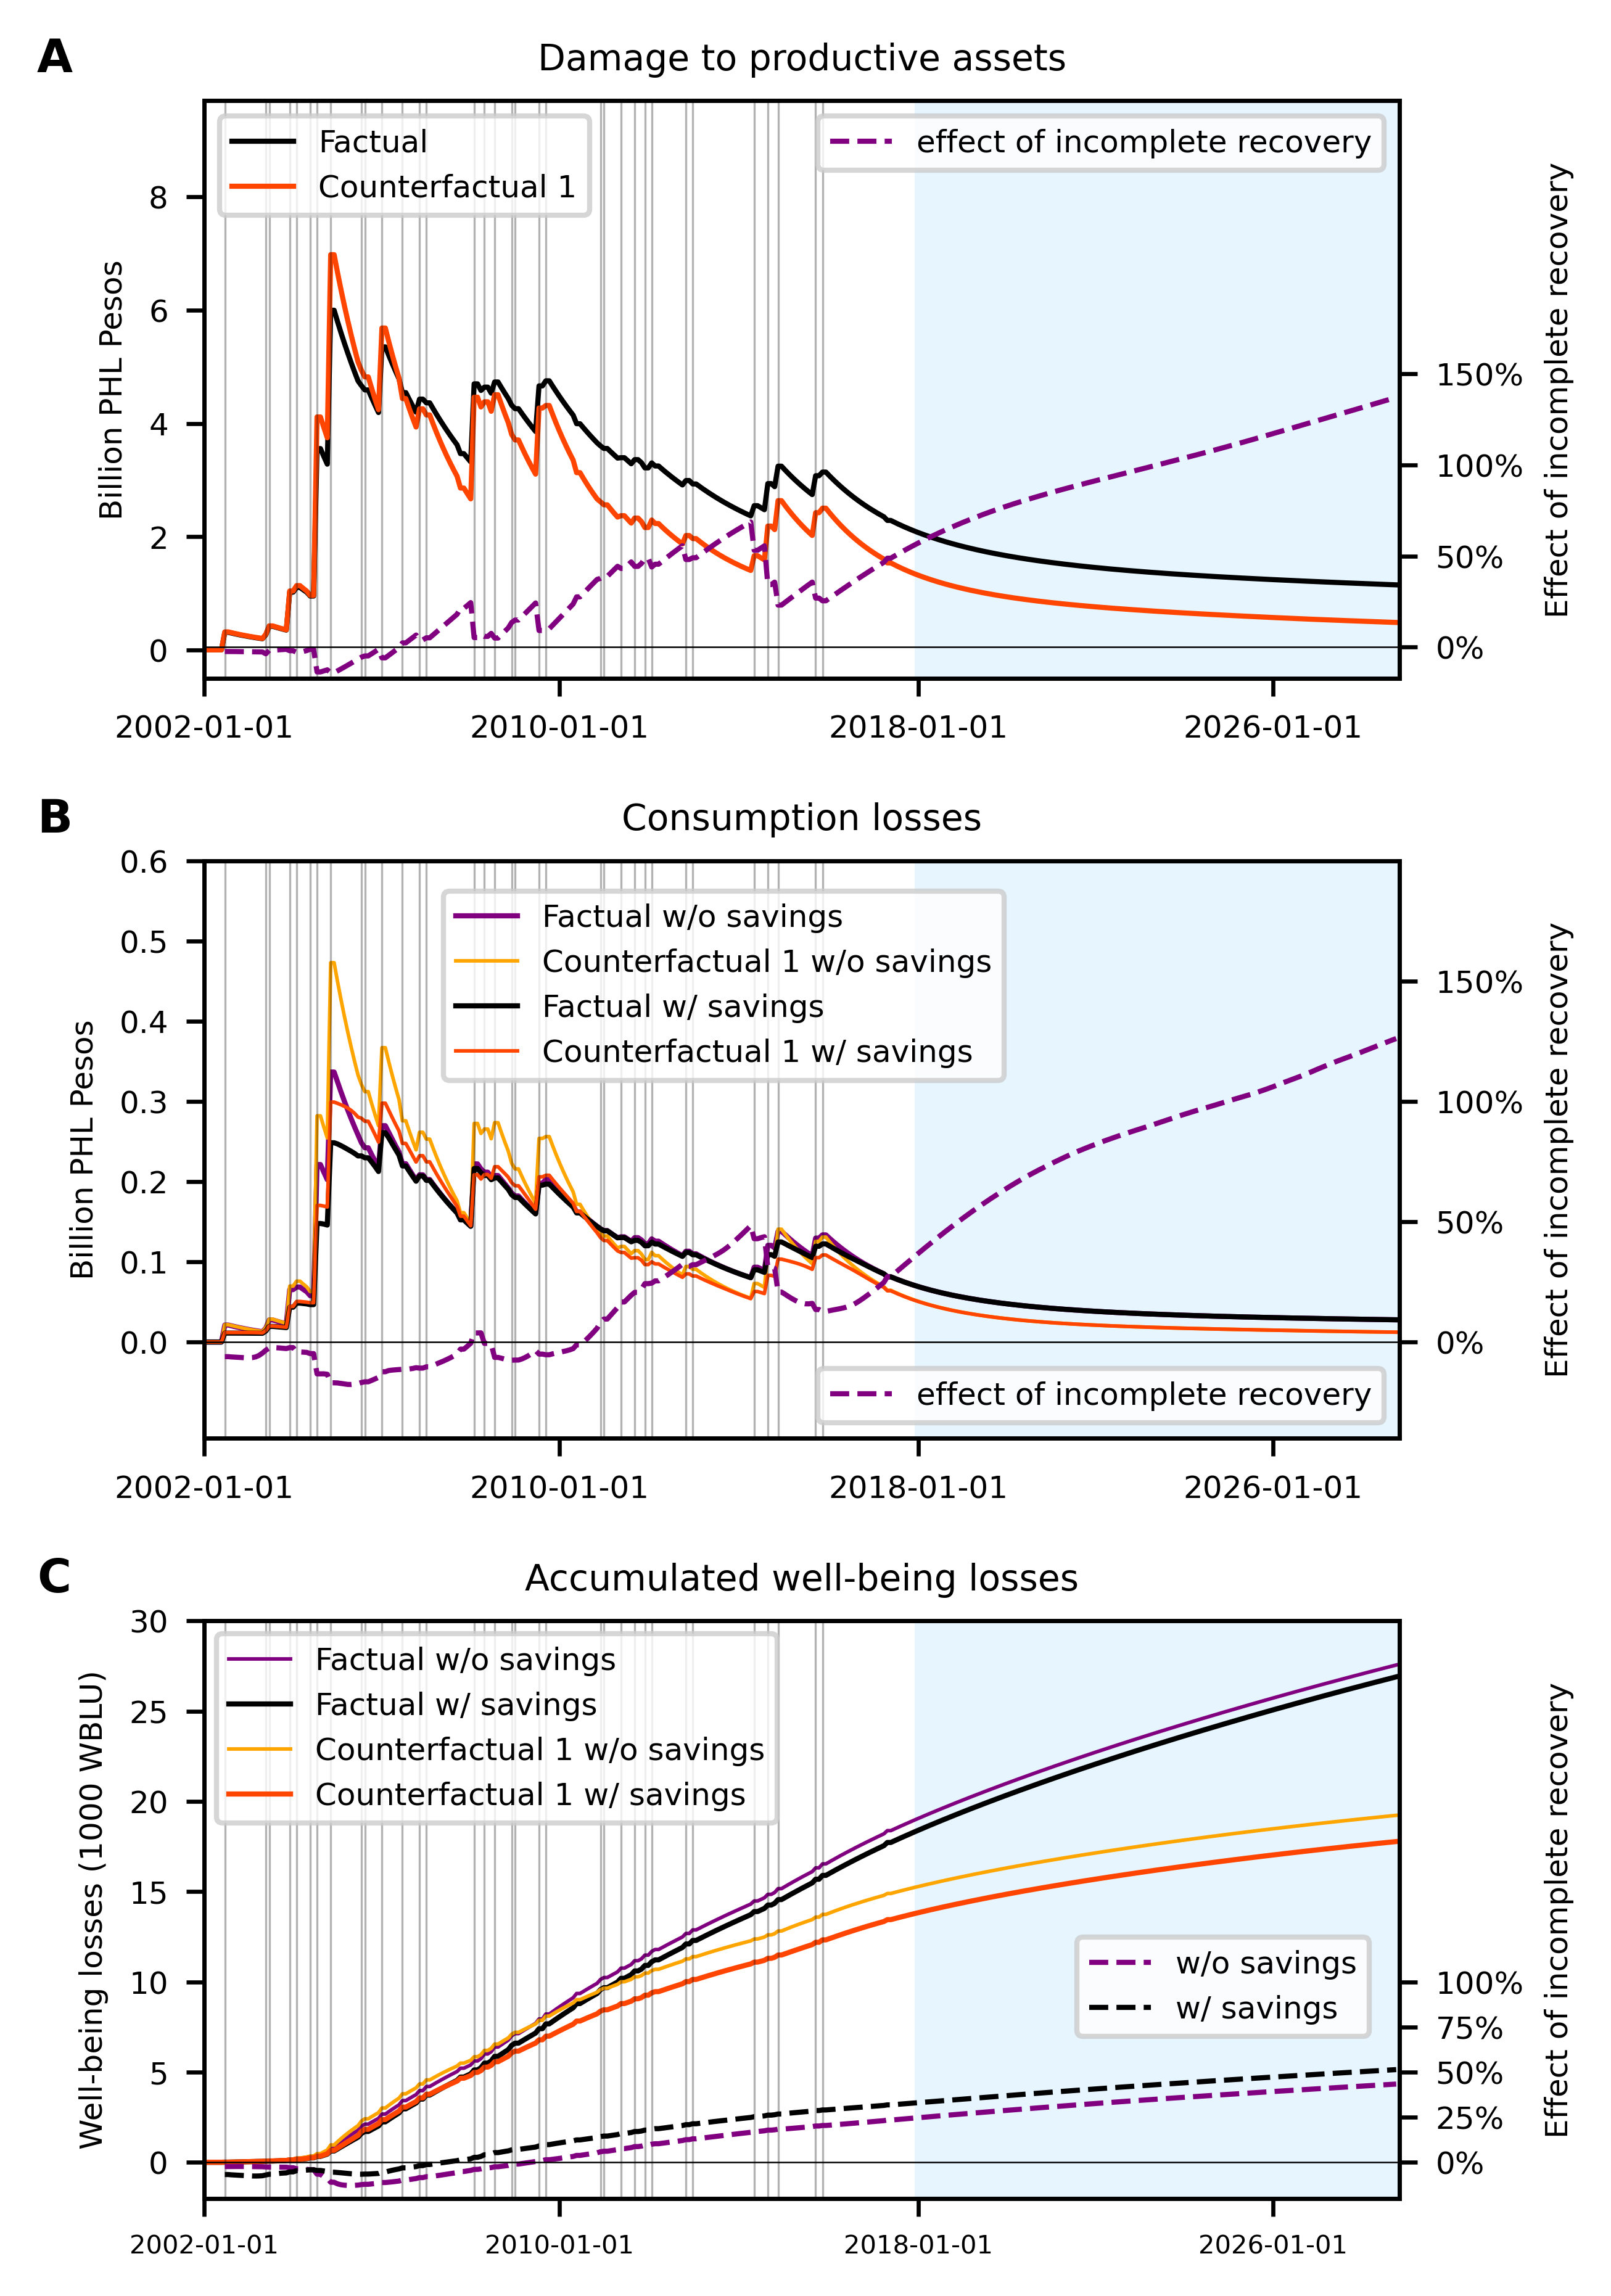

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig2 = plt.figure( figsize=(x_width, y_width), dpi=600)
gs = fig2.add_gridspec(3, 1)
fig2.patch.set_facecolor('white')

ax1=fig2.add_subplot(gs[0:1])
ax1.text(-0.14, 1.05, 'A', transform=ax1.transAxes, size=9, weight='bold')
ax1.plot(gov['keff'].iloc[:350]/1e9, c='black', label='Factual', linewidth=1.0)
ax1.plot(gov_c1['keff'].iloc[:350]/1e9, c='orangered', label='Counterfactual 1', linewidth=1.)
#ax1.plot(gov_shock_syn['keff'].iloc[:350]/1e9, c='orangered', label='SEpHH', linewidth=0.5)

#print(gov_shock.diff().iloc[6,:])
ax1.legend(fontsize=6, loc='upper left')
ax1.set_xlim([0,350])
ax1.set_ylabel('Billion PHL Pesos', fontsize=6)
ax1.set_title('Damage to productive assets', fontsize=7)
ax1.set_xticks(ticks)
ax1.set_xticklabels(tick_names, fontsize=6)
ax1.tick_params(axis='both', which='major', labelsize=6)

for sd in shock_dates:
    ax1.axvline(x=sd, c='k', alpha=0.3, linewidth=0.4)
ax1.axvspan(208,350, facecolor='lightskyblue', alpha=0.2)

ax6 = ax1.twinx()
ax6.plot((((gov['keff'].iloc[:350]*100)/gov_c1['keff'].iloc[:350])-100),
         c='purple', linewidth=1., linestyle='--', label='effect of incomplete recovery')
ax6.legend(fontsize=6, loc='upper right')
ax6.set_ylim([-17,300])
ax6.set_ylabel('Effect of incomplete recovery', fontsize=6)
ax6.set_yticks([0,50,100, 150])
ax6.set_yticklabels(['0%','50%','100%','150%'], fontsize=6)
ax6.tick_params(axis='y', which='major', labelsize=6)
ax6.axhline(y=0.0, color='k', linestyle='-', linewidth=0.3)

ax1.set_ylim([-0.5,9.7])


ax2=fig2.add_subplot(gs[1:2])
ax2.text(-0.14, 1.05, 'B', transform=ax2.transAxes, size=9, weight='bold')
#ax2.plot(gov_shock['inc'].iloc[:350]/1e9, label = 'income loss MEpHH', c='purple', linewidth=0.7)
#ax2.plot(gov['cons'].iloc[:350]/1e9, label = 'consumption loss without savings')

ax2.plot(gov['cons'].iloc[:350]/1e9,label = 'Factual w/o savings', c='purple', linewidth=1.)
ax2.plot(gov_c1['cons'].iloc[:350]/1e9,label = 'Counterfactual 1 w/o savings', c='orange', linewidth=0.7)
ax2.plot(gov['cons_sm'].iloc[:350]/1e9,label = 'Factual w/ savings', c='black', linewidth=1.)
ax2.plot(gov_c1['cons_sm'].iloc[:350]/1e9,label = 'Counterfactual 1 w/ savings', c='orangered', linewidth=0.7)


ax2.set_ylabel('Billion PHL Pesos', fontsize=6)
ax2.set_title('Consumption losses', fontsize=7)
ax2.legend(fontsize=6, loc=(0.2,0.62))
ax2.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6])
ax2.set_xticks(ticks)
ax2.set_xticklabels(tick_names, fontsize=6)
ax2.set_xlim([0,350])
ax2.tick_params(axis='both', which='major', labelsize=6)
for sd in shock_dates:
    ax2.axvline(x=sd, c='k', alpha=0.3, linewidth=0.4)
ax2.axvspan(208,350, facecolor='lightskyblue', alpha=0.2)
ax2.set_ylim([-0.12,0.6])

ax7 = ax2.twinx()
#ax7.plot((((gov_shock['inc'].iloc[:350]*100)/gov_shock_syn['inc'].iloc[:350])-100),
         #c='purple', linewidth=0.5, linestyle='--', label='income')
ax7.plot((((gov['cons_sm'].iloc[:350]*100)/gov_c1['cons_sm'].iloc[:350])-100),
         c='purple', linewidth=1., linestyle='--', label='effect of incomplete recovery')
ax7.legend(fontsize=6, loc='lower right')
ax7.set_ylim([-40,200])
ax7.set_ylabel('Effect of incomplete recovery', fontsize=6)
ax7.set_yticks([0,50,100, 150])
ax7.set_yticklabels(['0%','50%','100%','150%'], fontsize=6)
ax7.tick_params(axis='y', which='major', labelsize=6)
ax7.axhline(y=0.0, color='k', linestyle='-', linewidth=0.3)

ax4=fig2.add_subplot(gs[2:3])
ax4.text(-0.14, 1.05, 'C', transform=ax4.transAxes, size=9, weight='bold')
ax4.plot(gov['wb'].iloc[:350]/1000, c='purple', label='Factual w/o savings', linewidth=0.7)
ax4.plot(gov['wb_sm'].iloc[:350]/1000, c='black', label='Factual w/ savings', linewidth=1.)
ax4.plot(gov_c1['wb'].iloc[:350]/1000, c ='orange', label='Counterfactual 1 w/o savings', linewidth=0.7)
ax4.plot(gov_c1['wb_sm'].iloc[:350]/1000, c='orangered', label='Counterfactual 1 w/ savings', linewidth=1.)
ax5 = ax4.twinx()

ax5.plot(((gov['wb'].iloc[:350]*100)/gov_c1['wb'].iloc[:350])-100,label='w/o savings',
         c='purple', linewidth=1., linestyle='--')
ax5.plot(((gov['wb_sm'].iloc[:350]*100)/gov_c1['wb_sm'].iloc[:350])-100, c='black', label='w/ savings', linewidth=1.,  linestyle='--')
ax5.legend(fontsize=6, loc=(0.73,0.28))

ax4.legend(fontsize=6, loc=(0.01,0.65))
ax4.tick_params(axis='both', which='major', labelsize=6)
ax4.set_title('Accumulated well-being losses', fontsize=7)
ax4.set_ylabel('Well-being losses (1000 WBLU)', fontsize=6)
ax4.set_xticks(ticks)
ax4.set_xticklabels(tick_names, fontsize=5)
ax4.set_xlim([0,350])
ax4.set_ylim([-2.,30])
ax5.set_ylim([-20,300])
ax5.set_ylabel('Effect of incomplete recovery', fontsize=6)
ax5.set_yticks([0,25,50,75,100])
ax5.set_yticklabels(['0%', '25%','50%','75%','100%'], fontsize=6)
ax5.tick_params(axis='y', which='major', labelsize=6)
ax5.axhline(y=0.0, color='k', linestyle='-', linewidth=0.3)
for sd in shock_dates:
    ax4.axvline(x=sd, c='k', alpha=0.3, linewidth=0.4)
ax4.axvspan(208,350, facecolor='lightskyblue', alpha=0.2)
plt.tight_layout()
plt.savefig('/home/insauer/projects/revisions_iScience/final_resubmission/main_figures/figure_3.pdf')
plt.savefig('/home/insauer/projects/revisions_iScience/final_resubmission/main_figures/figure_3.png')

# Figure 4

In [13]:
cm = 1/2.54
x_width= 16.5*cm
y_width= 17.*cm
y_width

6.692913385826771

In [15]:
phl_df_fig1=pd.read_csv('/home/insauer/projects/revisions_iScience/final_resubmission/final_data/figures/figure_1/fig_1_regional_info.csv')
phl_df_fig1=phl_df_fig1[['people', 'people_log', 'region_name']]
phl_df_fig1

people  people_log  region_name
0   1.169919e+06    6.068156  PH010000000
1   8.160874e+05    5.911737  PH020000000
2   2.507250e+06    6.399198  PH030000000
3   1.261569e+06    6.100911  PH050000000
4   1.699459e+06    6.230311  PH060000000
5   1.672148e+06    6.223275  PH070000000
6   9.755546e+05    5.989252  PH080000000
7   3.250752e+06    6.511984  PH040000000
8   6.969877e+05    5.843225  PH170000000
9   8.243313e+05    5.916102  PH090000000
10  1.029370e+06    6.012572  PH100000000
11  3.018661e+06    6.479814  PH130000000
12  4.020150e+05    5.604242  PH140000000
13  6.162467e+05    5.789755  PH150000000
14  1.156213e+06    6.063038  PH110000000
15  1.054574e+06    6.023077  PH120000000
16  5.792731e+05    5.762883  PH160000000

In [16]:
shape_path = '/home/insauer/mnt/pikhome/hhwb_backup/data/shapes/phl_adm_psa_namria_20200529_shp/phl_admbnda_adm1_psa_namria_20200529.shp'
prvS = gpd.GeoDataFrame()
prvS = gpd.read_file(shape_path)

prvS=prvS.merge(phl_df_fig1, left_on='ADM1_PCODE', right_on='region_name')


region_results= pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/reg_data_median.csv')
region_results['region_name']=region_results[['region']].replace({"region": REGION_DICT})


prvS=prvS.merge(region_results, left_on='ADM1_PCODE', right_on='region_name')

prvS['d_cons']=prvS['d_cons_pc']*prvS['people']

prvS['d_cons_pc_log']=np.log10(prvS['d_cons_pc'])
prvS['d_cons_log']=np.log10(prvS['d_cons'])

prvS['d_cons_pc_log']=np.log10(prvS['d_cons_pc'])
prvS['soc_res']=prvS['soc_res']*100
prvS['soc_res_cons']=prvS['soc_res_cons']*100

shape_path_syn = '/home/insauer/mnt/pikhome/hhwb_backup/data/shapes/phl_adm_psa_namria_20200529_shp/phl_admbnda_adm1_psa_namria_20200529.shp'
prvS_syn = gpd.GeoDataFrame()
prvS_syn = gpd.read_file(shape_path_syn)

prvS_syn=prvS_syn.merge(phl_df_fig1, left_on='ADM1_PCODE', right_on='region_name')

region_results_syn= pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/reg_c1_data_median.csv')
region_results_syn['region_name']=region_results_syn[['region']].replace({"region": REGION_DICT})
prvS_syn=prvS_syn.merge(region_results_syn, left_on='ADM1_PCODE', right_on='region_name')
prvS_syn['n_events']=prvS['n_events']
prvS_syn['pc_income']=prvS['pc_income']
prvS_syn['d_cons_pc_log']=np.log10(prvS_syn['d_cons_pc'])
prvS_syn['d_cons']=prvS_syn['d_cons_pc']*prvS_syn['people']
prvS_syn['d_cons_log']=np.log10(prvS_syn['d_cons'])
prvS_syn['soc_res']=prvS_syn['soc_res']*100
prvS_syn['soc_res_cons']=prvS_syn['soc_res_cons']*100
prvS.iloc[:,-20:]

region      pc_income  n_events  reco_time  reco_time_ev  \
0     15.0   30932.212442      27.0   0.041776     25.408563   
1     14.0   84420.281672       2.0   0.000370     10.741758   
2     13.0  141288.719632      21.0   0.030392     17.705720   
3      1.0   69856.847809      27.0   0.143560     14.708231   
4      2.0   72463.981025      12.0   0.057037      7.859429   
5      3.0   85847.375946      32.0   0.734618     19.825744   
6     41.0   96786.087484      23.0   0.001528     16.622415   
7     42.0   74175.286959      15.0   0.006909     15.971677   
8      9.0   54357.782743      18.0   0.079105     26.521132   
9      5.0   55934.375298      13.0   0.013867     12.015762   
10     6.0   65451.666023      22.0   0.035724     20.327897   
11     7.0   69735.539969       3.0   0.000296      6.959238   
12     8.0   61254.954383       1.0   0.000073     20.329670   
13    10.0   66178.045928      11.0   0.004209     33.398819   
14    11.0   76147.233070       4.0   0.000622      7.982858   
15    12.0   58412.583926      20.0   0.063195     21.423886   
16    16.0   64882.722357      12.0   0.010569     11.630825   

    time_under_sub_rec  time_under_sub_tot    d_keff_abs  wb_loss_pc  \
0             0.017012           16.281763  3.005075e+07    0.003486   
1             0.000203            3.124265  4.794765e+05    0.000020   
2             0.004488            0.155225  1.018249e+09    0.001358   
3             0.049053            2.182127  7.645160e+08    0.008021   
4             0.015001            1.419564  2.398159e+08    0.001788   
5             0.254501            1.598488  1.227815e+10    0.053580   
6             0.000202            1.136037  3.985429e+07    0.000060   
7             0.003295            4.661053  1.314322e+07    0.000318   
8             0.033310            7.315158  1.268262e+08    0.004574   
9             0.004360            6.346481  5.959200e+07    0.000580   
10            0.012912            3.517635  2.600792e+08    0.002134   
11            0.000048            8.733672  1.388087e+06    0.000021   
12            0.000045            9.705603  7.680242e+04    0.000027   
13            0.001576            8.957609  8.916191e+06    0.000265   
14            0.000118            3.237270  4.265266e+06    0.000025   
15            0.029436           12.617797  1.948627e+08    0.003552   
16            0.002643            7.446589  2.003405e+07    0.000400   

     wb_loss_abs   soc_res  soc_res_cons     d_cons_pc  wb_loss_pc_log  \
0     436.887671  0.050038     15.689044   1548.254984       -2.457638   
1       2.286332  0.306886     44.035822     52.917422       -4.707292   
2    1192.633142  0.643683     44.723063   2649.044199       -2.867178   
3    2762.766582  0.205450     33.120681   6768.579774       -2.095799   
4     441.201383  0.417000     48.680090   1998.291111       -2.747717   
5   38165.494409  0.236727     32.150953  53759.417127       -1.270998   
6      58.231037  0.586526     51.095417    119.516545       -4.223899   
7      69.262846  0.150593     30.196231    245.229199       -3.497181   
8    1075.970495  0.086682     22.358553   2496.486134       -2.339702   
9     200.379477  0.229860     37.016596    510.008261       -3.236749   
10   1071.028659  0.179240     28.367136   1896.653439       -2.670729   
11     10.070207  0.323310     48.016685     41.446220       -4.682333   
12      7.428913  0.153659     32.146233     49.785633       -4.575969   
13     77.084169  0.093685     26.143327    161.916115       -3.576801   
14      8.619223  0.696755     55.076942     56.445579       -4.605996   
15   1061.361132  0.134620     27.951796   2356.340229       -2.449524   
16     66.206154  0.240579     41.564082    337.739499       -3.397808   

    wb_loss_abs_log  d_keff_abs_log region_name_y        d_cons  \
0          2.640369        7.477854   PH150000000  9.541069e+08   
1          0.357657        5.680760   PH140000000  2.127360e+07   
2          3.076505 

In [18]:
prvS_syn.iloc[:,:20]

Shape_Leng  Shape_Area                               ADM1_EN   ADM1_PCODE  \
0    53.623497    1.050272  Autonomous Region in Muslim Mindanao  PH150000000   
1     8.027454    1.546712      Cordillera Administrative Region  PH140000000   
2     2.320234    0.050216               National Capital Region  PH130000000   
3    14.995101    1.043983                              Region I  PH010000000   
4    19.139048    2.241812                             Region II  PH020000000   
5    15.949563    1.793513                            Region III  PH030000000   
6    27.624115    1.326710                           Region IV-A  PH040000000   
7    78.804542    2.220374                           Region IV-B  PH170000000   
8    23.181441    1.196677                             Region IX  PH090000000   
9    44.923243    1.446324                              Region V  PH050000000   
10   27.589382    1.657135                             Region VI  PH060000000   
11   29.113105    1.178431                            Region VII  PH070000000   
12   42.021179    1.726804                           Region VIII  PH080000000   
13   15.002953    1.435115                              Region X  PH100000000   
14   17.934222    1.539971                             Region XI  PH110000000   
15   13.229749    1.471068                            Region XII  PH120000000   
16   28.166754    1.540820                           Region XIII  PH160000000   

   ADM1_REF           ADM1ALT1EN ADM1ALT2EN            ADM0_EN ADM0_PCODE  \
0      None                 ARMM       None  Philippines (the)         PH   
1      None                  CAR       None  Philippines (the)         PH   
2      None                  NCR       None  Philippines (the)         PH   
3      None        Ilocos Region       None  Philippines (the)         PH   
4      None       Cagayan Valley       None  Philippines (the)         PH   
5      None        Central Luzon       None  Philippines (the)         PH   
6      None           Calabarzon       None  Philippines (the)         PH   
7      None             Mimaropa       None  Philippines (the)         PH   
8      None  Zamboanga Peninsula       None  Philippines (the)         PH   
9      None         Bicol Region       None  Philippines (the)         PH   
10     None      Western Visayas       None  Philippines (the)         PH   
11     None      Central Visayas       None  Philippines (the)         PH   
12     None      Eastern Visayas       None  Philippines (the)         PH   
13     None    Northern Mindanao       None  Philippines (the)         PH   
14     None         Davao Region       None  Philippines (the)         PH   
15     None         Soccsksargen       None  Philippines (the)         PH   
16     None               Caraga       None  Philippines (the)         PH   

         date    validOn     validTo  \
0  2016-06-30 2020-05-29  0000/00/00   
1  2016-06-30 2020-05-29  0000/00/00   
2  2016-06-30 2020-05-29  0000/00/00   
3  2016-06-30 2020-05-29  0000/00/00   
4  2016-06-30 2020-05-29  0000/00/00   
5  2016-06-30 2020-05-29  0000/00/00   
6  2016-06-30 2020-05-29  0000/00/00   
7  2016-06-30 2020-05-29  0000/00/00   
8  2016-06-30 2020-05-29  0000/00/00   
9  2016-06-30 2020-05-29  0000/00/00   
10 2016-06-30 2020-05-29  0000/00/00   
11 2016-06-30 2020-05-29  0000/00/00   
12 2016-06-30 2020-05-29  0000/00/00   
13 2016-06-30 2020-05-29  0000/00/00   
14 2016-06-30 2020-05-29  0000/00/00   
15 2016-06-30 2020-05-29  0000/00/00   
16 2016-06-30 2020-05-29  0000/00/00   

                                             geometry        people  \
0   MULTIPOLYGON (((119.46876 4.5936, 119.46881 4....  6.162467e+05   
1   POLYGON ((121.22208 18.50058, 121.22086 18.483...  4.020150e+05   
2   POLYGON ((121.03842 14.78525, 121.03876 14.785...  3.018661e+06   
3   MULTIPOLYGON (((119.86596 15.81539, 119.86597 ...  1.169919e+06   
4   MULTIPOLYGON (((122.46667 16.92135, 122.46674 ...  8.160874e+05   
5   MULTIPO

In [19]:
prvS['abs_diff_reco_time']=prvS['reco_time']-prvS_syn['reco_time']
prvS['abs_diff_reco_time_ev']=prvS['reco_time_ev']-prvS_syn['reco_time_ev']

prvS['abs_diff_time_usl']=prvS['time_under_sub_rec']-prvS_syn['time_under_sub_rec']
prvS['abs_diff_d_keff_abs']=prvS['d_keff_abs']-prvS_syn['d_keff_abs']
prvS['abs_diff_d_cons']=prvS['d_cons']-prvS_syn['d_cons']
prvS['abs_diff_d_keff_abs_log']=-np.log10(-prvS['abs_diff_d_keff_abs'])
prvS['abs_diff_d_cons_log']=np.log10(prvS['abs_diff_d_cons'].abs()) *(prvS['abs_diff_d_cons'].abs()/prvS['abs_diff_d_cons'])

prvS.iloc[:,-20:]

/home/insauer/miniforge-pypy3/envs/drought_damages/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


d_keff_abs  wb_loss_pc   wb_loss_abs   soc_res  soc_res_cons  \
0   3.005075e+07    0.003486    436.887671  0.050038     15.689044   
1   4.794765e+05    0.000020      2.286332  0.306886     44.035822   
2   1.018249e+09    0.001358   1192.633142  0.643683     44.723063   
3   7.645160e+08    0.008021   2762.766582  0.205450     33.120681   
4   2.398159e+08    0.001788    441.201383  0.417000     48.680090   
5   1.227815e+10    0.053580  38165.494409  0.236727     32.150953   
6   3.985429e+07    0.000060     58.231037  0.586526     51.095417   
7   1.314322e+07    0.000318     69.262846  0.150593     30.196231   
8   1.268262e+08    0.004574   1075.970495  0.086682     22.358553   
9   5.959200e+07    0.000580    200.379477  0.229860     37.016596   
10  2.600792e+08    0.002134   1071.028659  0.179240     28.367136   
11  1.388087e+06    0.000021     10.070207  0.323310     48.016685   
12  7.680242e+04    0.000027      7.428913  0.153659     32.146233   
13  8.916191e+06    0.000265     77.084169  0.093685     26.143327   
14  4.265266e+06    0.000025      8.619223  0.696755     55.076942   
15  1.948627e+08    0.003552   1061.361132  0.134620     27.951796   
16  2.003405e+07    0.000400     66.206154  0.240579     41.564082   

       d_cons_pc  wb_loss_pc_log  wb_loss_abs_log  d_keff_abs_log  \
0    1548.254984       -2.457638         2.640369        7.477854   
1      52.917422       -4.707292         0.357657        5.680760   
2    2649.044199       -2.867178         3.076505        9.007853   
3    6768.579774       -2.095799         3.441329        8.883386   
4    1998.291111       -2.747717         2.644628        8.379878   
5   53759.417127       -1.270998         4.581671       10.089133   
6     119.516545       -4.223899         1.765154        7.600475   
7     245.229199       -3.497181         1.840465        7.118684   
8    2496.486134       -2.339702         3.031800        8.103209   
9     510.008261       -3.236749         2.301760        7.775187   
10   1896.653439       -2.670729         3.029792        8.415091   
11     41.446220       -4.682333         1.003009        6.142417   
12     49.785633       -4.575969         0.870924        4.885375   
13    161.916115       -3.576801         1.886861        6.950154   
14     56.445579       -4.605996         0.934159        6.629932   
15   2356.340229       -2.449524         3.025861        8.289728   
16    337.739499       -3.397808         1.820557        7.301748   

   region_name_y        d_cons  d_cons_pc_log  d_cons_log  abs_diff_reco_time  \
0    PH150000000  9.541069e+08       3.189842    8.979597           -0.035167   
1    PH140000000  2.127360e+07       1.723599    7.327841            0.000039   
2    PH130000000  7.996566e+09       3.423089    9.902904           -0.006928   
3    PH010000000  7.918687e+09       3.830498    9.898653           -0.014991   
4    PH020000000  1.630780e+09       3.300659    9.212395            0.000439   
5    PH030000000  1.347883e+11       4.730455   11.129652           -0.197592   
6    PH040000000  3.885186e+08       2.077428    8.589412           -0.000732   
7    PH170000000  1.709217e+08       2.389572    8.232797           -0.000954   
8    PH090000000  2.057932e+09       3.397329    9.313431           -0.006024   
9    PH050000000  6.434104e+08       2.707577    8.808488           -0.004755   
10   PH060000000  3.223284e+09       3.277988    9.508299           -0.010102   
11   PH070000000  6.930420e+07       1.617485    7.840760           -0.000231   
12   PH080000000  4.856860e+07       1.697104    7.686356            0.000050   
13   PH100000000  1.666717e+08       2.209290    8.221862           -0.001150   
14   PH110000000  6.526309e+07       1.751630    7.814668           -0.000223   
15   PH120000000  2.484936e+09       3.372238    9.395315           -0.020525   
16   PH160000000  1.956434e+08       2.528582    8.291465           -0.000068   

    abs_diff_reco_time_ev  abs_diff_time_us

In [20]:
prvS['abs_diff_d_cons_log_mil']=prvS['abs_diff_d_cons_log']-6
#prvS['abs_diff_d_cons_log_mil'].iloc[0]=prvS['abs_diff_d_cons_log_mil'].iloc[0]+12
prvS.iloc[:,-20:]

wb_loss_pc   wb_loss_abs   soc_res  soc_res_cons     d_cons_pc  \
0     0.003486    436.887671  0.050038     15.689044   1548.254984   
1     0.000020      2.286332  0.306886     44.035822     52.917422   
2     0.001358   1192.633142  0.643683     44.723063   2649.044199   
3     0.008021   2762.766582  0.205450     33.120681   6768.579774   
4     0.001788    441.201383  0.417000     48.680090   1998.291111   
5     0.053580  38165.494409  0.236727     32.150953  53759.417127   
6     0.000060     58.231037  0.586526     51.095417    119.516545   
7     0.000318     69.262846  0.150593     30.196231    245.229199   
8     0.004574   1075.970495  0.086682     22.358553   2496.486134   
9     0.000580    200.379477  0.229860     37.016596    510.008261   
10    0.002134   1071.028659  0.179240     28.367136   1896.653439   
11    0.000021     10.070207  0.323310     48.016685     41.446220   
12    0.000027      7.428913  0.153659     32.146233     49.785633   
13    0.000265     77.084169  0.093685     26.143327    161.916115   
14    0.000025      8.619223  0.696755     55.076942     56.445579   
15    0.003552   1061.361132  0.134620     27.951796   2356.340229   
16    0.000400     66.206154  0.240579     41.564082    337.739499   

    wb_loss_pc_log  wb_loss_abs_log  d_keff_abs_log region_name_y  \
0        -2.457638         2.640369        7.477854   PH150000000   
1        -4.707292         0.357657        5.680760   PH140000000   
2        -2.867178         3.076505        9.007853   PH130000000   
3        -2.095799         3.441329        8.883386   PH010000000   
4        -2.747717         2.644628        8.379878   PH020000000   
5        -1.270998         4.581671       10.089133   PH030000000   
6        -4.223899         1.765154        7.600475   PH040000000   
7        -3.497181         1.840465        7.118684   PH170000000   
8        -2.339702         3.031800        8.103209   PH090000000   
9        -3.236749         2.301760        7.775187   PH050000000   
10       -2.670729         3.029792        8.415091   PH060000000   
11       -4.682333         1.003009        6.142417   PH070000000   
12       -4.575969         0.870924        4.885375   PH080000000   
13       -3.576801         1.886861        6.950154   PH100000000   
14       -4.605996         0.934159        6.629932   PH110000000   
15       -2.449524         3.025861        8.289728   PH120000000   
16       -3.397808         1.820557        7.301748   PH160000000   

          d_cons  d_cons_pc_log  d_cons_log  abs_diff_reco_time  \
0   9.541069e+08       3.189842    8.979597           -0.035167   
1   2.127360e+07       1.723599    7.327841            0.000039   
2   7.996566e+09       3.423089    9.902904           -0.006928   
3   7.918687e+09       3.830498    9.898653           -0.014991   
4   1.630780e+09       3.300659    9.212395            0.000439   
5   1.347883e+11       4.730455   11.129652           -0.197592   
6   3.885186e+08       2.077428    8.589412           -0.000732   
7   1.709217e+08       2.389572    8.232797           -0.000954   
8   2.057932e+09       3.397329    9.313431           -0.006024   
9   6.434104e+08       2.707577    8.808488           -0.004755   
10  3.223284e+09       3.277988    9.508299           -0.010102   
11  6.930420e+07       1.617485    7.840760           -0.000231   
12  4.856860e+07       1.697104    7.686356            0.000050   
13  1.666717e+08       2.209290    8.221862           -0.001150   
14  6.526309e+07       1.751630    7.814668           -0.000223   
15  2.484936e+09       3.372238    9.395315           -0.020525   
16  1.956434e+08       2.528582    8.291465           -0.000068   

    abs_diff_reco_time_ev  abs_diff_time_usl  abs_diff_d_keff_abs  \
0                6.367238          -0.020922        -2.426806e+07   
1                2.269231           0.000203         3.032539e+04   
2               12.609875           0.001125        -2.733458e+08   
3                

In [29]:
indicators=['reco_time_ev', 'd_keff_abs_log', 'd_cons_log']
indicators2=['abs_diff_reco_time_ev', 'abs_diff_d_keff_abs_log', 'abs_diff_d_cons_log']
titles=['Recovery time', 'Asset damages', 'Consumption losses']
colors=[ 'inferno_r', 'inferno_r', 'inferno_r']
colors2=[ 'RdYlGn_r','summer', 'RdYlGn_r']
units=['% of lifetime', 'log10(PHL pesos)', 'log10(PHL pesos)']
units2=['% of lifetime', 'log10(PHL pesos)', 'log10(PHL pesos)']

In [24]:
prvS['abs_diff_soc_res']=prvS['soc_res']-prvS_syn['soc_res']
prvS['abs_diff_soc_res_cons']=prvS['soc_res_cons']-prvS_syn['soc_res_cons']
prvS['abs_diff_wb_loss_pc']=prvS['wb_loss_pc']-prvS_syn['wb_loss_pc']
prvS['abs_diff_wb_loss_abs']=prvS['wb_loss_abs']-prvS_syn['wb_loss_abs']

prvS['abs_diff_wb_loss_abs_log']=np.log10(prvS['abs_diff_wb_loss_abs'].abs())

prvS['abs_diff_wb_loss_pc_log']=np.log10(prvS['abs_diff_wb_loss_pc'].abs())# *(prvS['abs_diff_wb_loss_pc'].abs()/prvS['abs_diff_wb_loss_pc'])
prvS.iloc[:,-20:]

wb_loss_abs_log  d_keff_abs_log region_name_y        d_cons  \
0          2.640369        7.477854   PH150000000  9.541069e+08   
1          0.357657        5.680760   PH140000000  2.127360e+07   
2          3.076505        9.007853   PH130000000  7.996566e+09   
3          3.441329        8.883386   PH010000000  7.918687e+09   
4          2.644628        8.379878   PH020000000  1.630780e+09   
5          4.581671       10.089133   PH030000000  1.347883e+11   
6          1.765154        7.600475   PH040000000  3.885186e+08   
7          1.840465        7.118684   PH170000000  1.709217e+08   
8          3.031800        8.103209   PH090000000  2.057932e+09   
9          2.301760        7.775187   PH050000000  6.434104e+08   
10         3.029792        8.415091   PH060000000  3.223284e+09   
11         1.003009        6.142417   PH070000000  6.930420e+07   
12         0.870924        4.885375   PH080000000  4.856860e+07   
13         1.886861        6.950154   PH100000000  1.666717e+08   
14         0.934159        6.629932   PH110000000  6.526309e+07   
15         3.025861        8.289728   PH120000000  2.484936e+09   
16         1.820557        7.301748   PH160000000  1.956434e+08   

    d_cons_pc_log  d_cons_log  abs_diff_reco_time  abs_diff_reco_time_ev  \
0        3.189842    8.979597           -0.035167               6.367238   
1        1.723599    7.327841            0.000039               2.269231   
2        3.423089    9.902904           -0.006928              12.609875   
3        3.830498    9.898653           -0.014991               7.599940   
4        3.300659    9.212395            0.000439               1.449384   
5        4.730455   11.129652           -0.197592              13.862025   
6        2.077428    8.589412           -0.000732              10.660981   
7        2.389572    8.232797           -0.000954               5.032300   
8        3.397329    9.313431           -0.006024              15.019991   
9        2.707577    8.808488           -0.004755               1.518616   
10       3.277988    9.508299           -0.010102               9.243195   
11       1.617485    7.840760           -0.000231              -3.910542   
12       1.697104    7.686356            0.000050              15.494505   
13       2.209290    8.221862           -0.001150              22.624756   
14       1.751630    7.814668           -0.000223              -0.212190   
15       3.372238    9.395315           -0.020525               8.377735   
16       2.528582    8.291465           -0.000068               3.202291   

    abs_diff_time_usl  abs_diff_d_keff_abs  abs_diff_d_cons  \
0           -0.020922        -2.426806e+07    -2.360148e+07   
1            0.000203         3.032539e+04     8.125565e+06   
2            0.001125        -2.733458e+08     5.677076e+08   
3            0.014898        -1.424204e+08     1.570806e+09   
4            0.001824        -1.243978e+07     8.660354e+07   
5            0.106227        -3.780546e+09     3.327436e+10   
6           -0.000183        -1.507978e+07     2.029000e+07   
7            0.001169        -9.076076e+06    -4.590275e+06   
8            0.006935        -7.487856e+07     3.301329e+08   
9           -0.000913        -2.209086e+06     6.712049e+07   
10          -0.000400        -1.901544e+07     8.586412e+08   
11          -0.000112        -1.254133e+06     1.621161e+07   
12           0.000045        -2.925695e+04     2.161000e+07   
13          -0.000036        -8.298918e+06     3.562492e+06   
14          -0.000075        -4.714322e+05     1.110287e+07   
15           0.003367        -2.975265e+07     4.798807e+08   
16          -0.000358        -1.074560e+06     2.742796e+07   

    abs_diff_d_keff_abs_log  abs_diff_d_cons_log  abs_diff_d_cons_log_mil  \
0                 -7.385035            -7.372939               -13.372939   
1                       NaN             6.909854                 0.909854   
2                 -8.436712             8.754125              

In [25]:
variables=['wb_loss_abs_log', 'soc_res']
variables2=['abs_diff_wb_loss_abs_log', 'abs_diff_soc_res']
titles3=['Well-being losses', 'Socio-economic resilience']
units3=['Log10(WBLU)', '%']

In [26]:
dec_data=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/dec_data_mean.csv')
dec_data_5=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/dec_data_perc_5.csv')
dec_data_95=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/dec_data_perc_95.csv')
dec_data_median=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/dec_data_median.csv')
dec_data_median.iloc[:,-15:]

time_subreco_syn_sm     d_keff_ev  d_keff_ev_syn       d_keff   d_keff_syn  \
0             0.125587  1.257150e+05   69166.468588   543.038430   939.381550   
1             0.125967  1.607812e+05   77319.156992   887.316598  1483.438068   
2             0.033625  2.051317e+05   90723.604950  1209.220984  1856.106900   
3             0.008111  2.416502e+05   97161.317225  1450.179483  2067.500726   
4             0.008508  2.814967e+05  102293.774011  1863.661739  2501.751289   
5             0.001945  3.432629e+05  120462.486409  2245.227432  3007.106703   
6             0.001772  3.827688e+05  129511.314261  2577.616542  3311.831161   
7             0.000000  4.860474e+05  155233.281357  2877.292515  3549.810592   
8             0.000000  6.152114e+05  197640.495590  3104.531515  3866.648885   
9             0.000000  1.122697e+06  339434.692144  4012.189282  4700.134378   

        d_cons   d_cons_syn  wb_means_sm  wb_means_syn  wb_means_syn_sm  \
0  4831.836783  5285.257404     0.018224      0.013729         0.013729   
1  7701.597665  6028.754672     0.016813      0.009905         0.009813   
2  9308.415107  5256.197005     0.016740      0.006599         0.006344   
3  8000.280807  4108.882978     0.011421      0.003735         0.003434   
4  7169.192831  4762.826537     0.007583      0.003362         0.003008   
5  7271.756470  5006.466301     0.005793      0.002441         0.002115   
6  5983.255879  5405.018066     0.002980      0.001869         0.001539   
7  6568.397981  5452.978886     0.002227      0.001225         0.000979   
8  6235.195323  5716.191144     0.001078      0.000743         0.000574   
9  7470.376636  6801.770655     0.000401      0.000299         0.000201   

   wb_means   soc_res  soc_res_syn  soc_res_cons  soc_res_syn_cons_sm  
0  0.018313  0.000217     0.000501      0.112134             0.179820  
1  0.016904  0.000382     0.001089      0.115144             0.244797  
2  0.016874  0.000524     0.002121      0.129548             0.353033  
3  0.011556  0.000921     0.004386      0.181839             0.504785  
4  0.007727  0.001781     0.006018      0.259865             0.524079  
5  0.005925  0.002821     0.010338      0.310513             0.602463  
6  0.003094  0.006266     0.015586      0.430940             0.612287  
7  0.002323  0.009381     0.026225      0.438747             0.649179  
8  0.001147  0.020800     0.048899      0.496734             0.676248  
9  0.000432  0.072890     0.169864      0.537338             0.691038

In [27]:
cm = 1/2.54
x_width= 16.50*cm
y_width= 20.*cm
y_width

7.874015748031495

22.624755691386667
-3.9105417950094576
[Text(1, 0.0, '0'), Text(1, 10.0, '10'), Text(1, 20.0, '20'), Text(1, 30.0, '30'), Text(1, 40.0, '40')]
[Text(1, -30.0, '−30'), Text(1, -20.0, '−20'), Text(1, -10.0, '−10'), Text(1, 0.0, '0'), Text(1, 10.0, '10'), Text(1, 20.0, '20'), Text(1, 30.0, '30')]
-4.466229060793025
-9.577554482210623


/tmp/ipykernel_15521/2648751596.py:186: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax.set_yticklabels(ticks, fontsize=5)
/tmp/ipykernel_15521/2648751596.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax2.set_yticklabels(ticks2, fontsize=5)


[Text(1, 7.0, '7'), Text(1, 9.0, '9')]
[Text(1, -10.0, '−10'), Text(1, -8.0, '−8'), Text(1, -6.0, '−6'), Text(1, -4.0, '−4')]
10.52210967219731
-7.372939213385626


/tmp/ipykernel_15521/2648751596.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax2.set_yticklabels(ticks2, fontsize=5)


[Text(1, 7.0, '7'), Text(1, 8.0, '8'), Text(1, 9.0, '9'), Text(1, 10.0, '10'), Text(1, 11.0, '11'), Text(1, 12.0, '12')]
[Text(1, -15.0, '−15'), Text(1, -10.0, '−10'), Text(1, -5.0, '−5'), Text(1, 0.0, '0'), Text(1, 5.0, '5'), Text(1, 10.0, '10'), Text(1, 15.0, '15')]
4.581670828179449
0.3576573352297154


/tmp/ipykernel_15521/2648751596.py:186: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax.set_yticklabels(ticks, fontsize=5)
/tmp/ipykernel_15521/2648751596.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax2.set_yticklabels(ticks2, fontsize=5)


[Text(1, 0.0, '0'), Text(1, 1.0, '1'), Text(1, 2.0, '2'), Text(1, 3.0, '3'), Text(1, 4.0, '4'), Text(1, 5.0, '5')]
[Text(1, -2.0, '−2'), Text(1, 0.0, '0'), Text(1, 2.0, '2'), Text(1, 4.0, '4'), Text(1, 6.0, '6')]
0.69675456039807
0.05003767376796


/tmp/ipykernel_15521/2648751596.py:357: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax.set_yticklabels(ticks, fontsize=5)
/tmp/ipykernel_15521/2648751596.py:361: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax2.set_yticklabels(ticks2, fontsize=5)


[Text(1, 0.0, '0.0'), Text(1, 0.2, '0.2'), Text(1, 0.4, '0.4'), Text(1, 0.6000000000000001, '0.6'), Text(1, 0.8, '0.8')]
[Text(1, -0.8, '−0.8'), Text(1, -0.6000000000000001, '−0.6'), Text(1, -0.4, '−0.4'), Text(1, -0.19999999999999996, '−0.2'), Text(1, 0.0, '0.0'), Text(1, 0.19999999999999996, '0.2')]


/tmp/ipykernel_15521/2648751596.py:357: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax.set_yticklabels(ticks, fontsize=5)
/tmp/ipykernel_15521/2648751596.py:361: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cax2.set_yticklabels(ticks2, fontsize=5)
/tmp/ipykernel_15521/2648751596.py:379: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


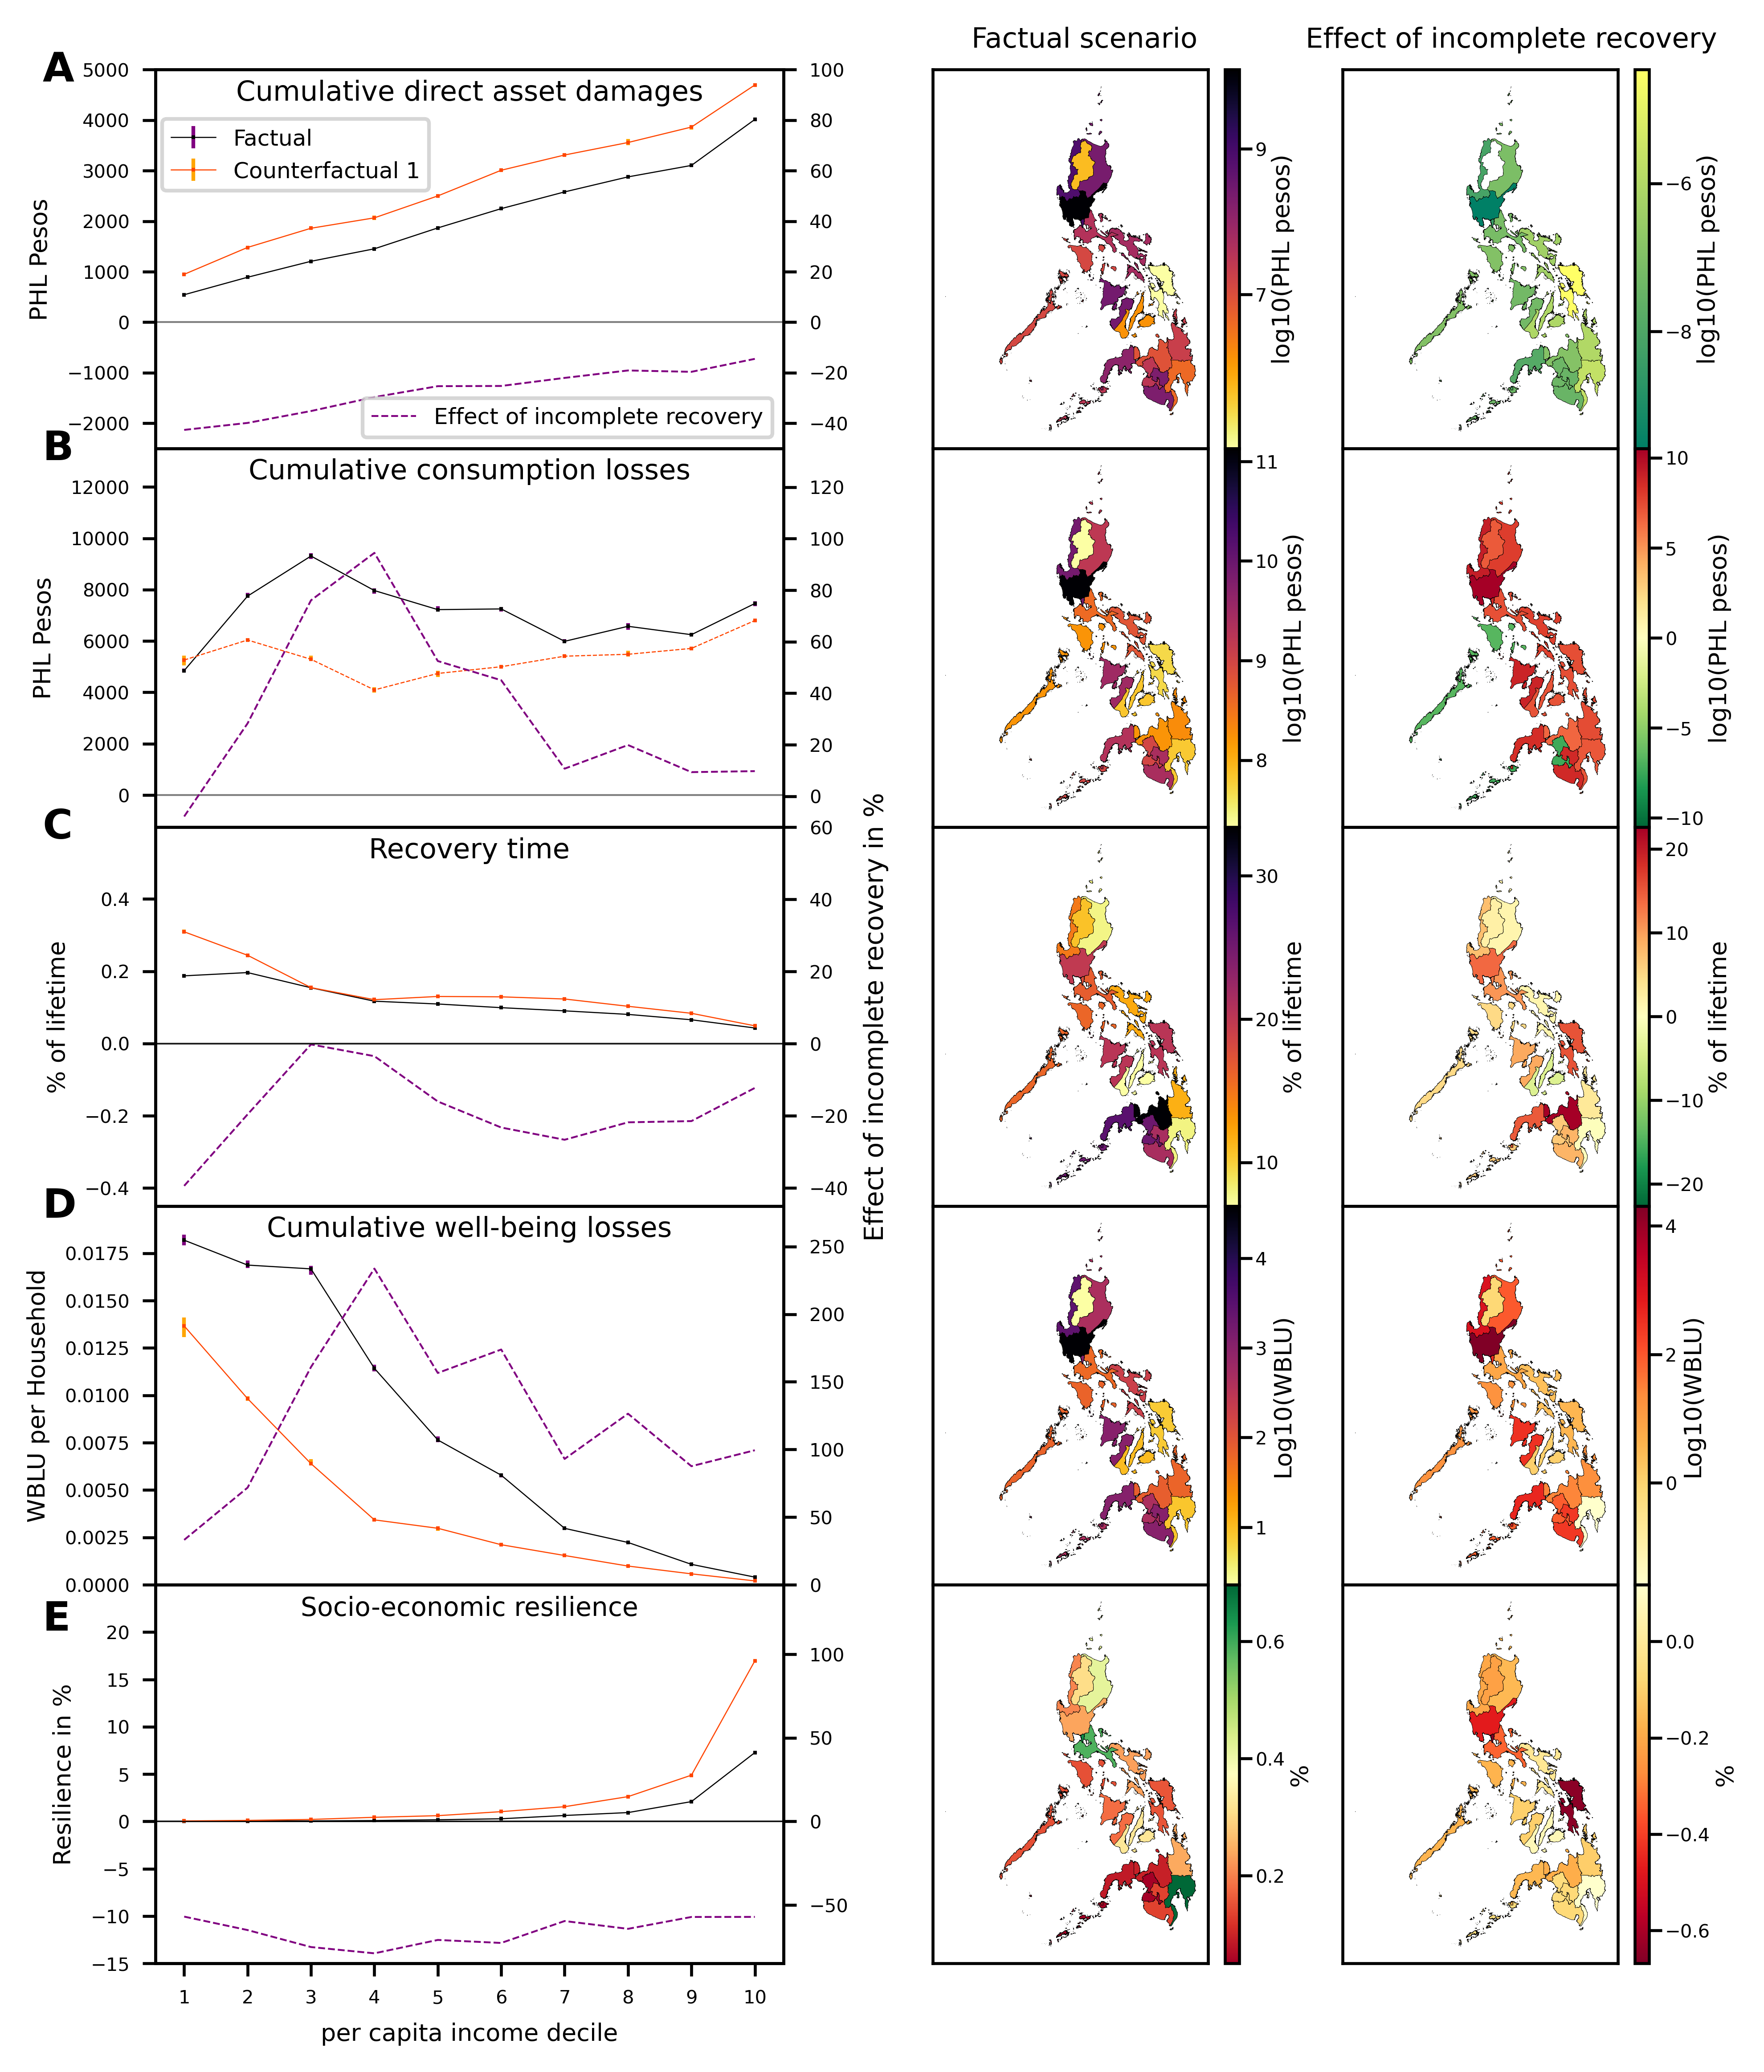

In [30]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(x_width,y_width), dpi=600)
fig.patch.set_facecolor('white')

gs = fig.add_gridspec(30, 48)
plt.subplots_adjust(top=0.95, bottom= 0.05, left= 0.08, right=0.95, wspace=0.1, hspace=0.0)
ax3 = fig.add_subplot(gs[0:6, 0:20])
ax4 = fig.add_subplot(gs[6:12, 0:20])
ax1 = fig.add_subplot(gs[12:18, 0:20])
y_err_low=(dec_data['time_reco_sm']-dec_data_5['time_reco_sm'])
y_err_up=(dec_data_95['time_reco_sm']-dec_data['time_reco_sm'])

ax1.errorbar(dec_data['decile'],dec_data['time_reco_sm'],yerr=[y_err_low,y_err_up] ,
             marker='_', markersize=1, c=rgba_dark,ecolor='purple', label='Factual', linewidth=0.3, elinewidth=1)

y_err_low_syn=(dec_data['time_reco_syn_sm']-dec_data_5['time_reco_syn_sm'])
y_err_up_syn=(dec_data_95['time_reco_syn_sm']-dec_data['time_reco_syn_sm'])

ax1.errorbar(dec_data['decile'],dec_data['time_reco_syn_sm'],yerr=[y_err_low_syn,y_err_up_syn] ,
             marker='_', markersize=1, c=rgba_syn_dark,ecolor='orange', label='Counterfactual 1', linewidth=0.3, elinewidth=1)



#ax1.plot(dec_data['decile'],dec_data['d_keff_syn'], c=rgba_syn_dark, label='SSpHH')

ax1.set_ylabel('% of lifetime', fontsize=6.5)
ax1.set_xlabel('per capita income decile', fontsize=6.5)
ax1.set_title('Recovery time', fontsize=7.5, x=0.5, y=0.86)
#ax3.set_xticks(ticks)
#ax3.set_xticklabels(tick_names, fontsize=5)
ax1.axhline(y=0.0, color='gray', linestyle='-', linewidth=0.5)

ax6 = ax1.twinx()
ax6.plot(dec_data['decile'], (dec_data['time_reco_sm']*100/dec_data['time_reco_syn_sm'])-100,
          linestyle='--',color='purple', linewidth=0.5,label='Effect of incomplete recovery')
#ax6.legend(fontsize=4, loc='lower right')
ax6.tick_params(axis='both', which='major', labelsize=5)
ax6.set_ylabel('Effect of incomplete recovery in %', fontsize=7)
#ax6.set_yticks([0,50,100, 150])
#ax6.set_yticklabels(['0%','50%','100%','150%'], fontsize=5)
#ax6.tick_params(axis='y', which='major', labelsize=5)
ax6.axhline(y=0.0, color='k', linestyle='-', linewidth=0.3)
ax6.set_ylim([-45,60])
ax1.text(-0.18, 0.97, 'C', transform=ax1.transAxes, 
                size=11, weight='bold')
ax1.tick_params(axis='both', which='major', labelsize=5)
#ax1.set_ylim([-0.14,0.35])
ax1.set_xticks(np.arange(1,11))
ax1.set_ylim([-0.45,0.599])
#ax1.legend(fontsize=5, loc='upper left')



y_err_low=(dec_data['d_keff']-dec_data_5['d_keff'])
y_err_up=(dec_data_95['d_keff']-dec_data['d_keff'])

ax3.errorbar(dec_data['decile'],dec_data['d_keff'],yerr=[y_err_low,y_err_up] ,
             marker='_', markersize=1, c=rgba_dark,ecolor='purple', label='Factual', linewidth=0.3, elinewidth=1)

y_err_low_syn=(dec_data['d_keff_syn']-dec_data_5['d_keff_syn'])
y_err_up_syn=(dec_data_95['d_keff_syn']-dec_data['d_keff_syn'])

ax3.errorbar(dec_data['decile'],dec_data['d_keff_syn'],yerr=[y_err_low_syn,y_err_up_syn] ,
             marker='_', markersize=1, c=rgba_syn_dark,ecolor='orange', label='Counterfactual 1', linewidth=0.3, elinewidth=1)

ax3.set_ylabel('PHL Pesos', fontsize=6.5)
ax3.set_xlabel('per capita income decile', fontsize=6.5)
ax3.set_title('Cumulative direct asset damages', fontsize=7.5, x=0.5, y=0.86)
#ax3.set_xticks(ticks)
#ax3.set_xticklabels(tick_names, fontsize=5)
ax3.axhline(y=0.0, color='gray', linestyle='-', linewidth=0.5)
ax3.tick_params(axis='both', which='major', labelsize=5)
ax3.text(-0.18, 0.97, 'A', transform=ax3.transAxes, 
                size=11, weight='bold')
ax3.set_ylim([-2500.,5000.])
ax3.set_xticks(np.arange(1,11))

ax7 = ax3.twinx()
ax7.plot(dec_data['decile'], (dec_data['d_keff']*100/dec_data['d_keff_syn'])-100,
          linestyle='--',color='purple', linewidth=0.5,label='Effect of incomplete recovery')
ax7.legend(fontsize=6, loc='lower right')

#ax7.set_ylabel('Effect of incomplete recovery  in %', fontsize=6.5)
ax7.tick_params(axis='both', which='major', labelsize=5)
ax7.set_ylim([-50,100])
ax3.legend(fontsize=6, loc=(0.01,0.68))



#ax5.plot(dec_data['decile'],dec_data['wb_means'], c=rgba_light, linestyle='--', linewidth=0.8, label='MEpHH without savings')
#ax5.plot(dec_data['decile'],dec_data['wb_means_syn'], c=rgba_syn_light, linestyle='--', linewidth=0.8,label='SEpHH without savings')

y_err_low=(dec_data['d_cons']-dec_data_5['d_cons'])
y_err_up=(dec_data_95['d_cons']-dec_data['d_cons'])

ax4.errorbar(dec_data['decile'],dec_data['d_cons'],yerr=[y_err_low,y_err_up] ,
             marker='_', markersize=1, c=rgba_dark,ecolor='purple', label='Factual', linewidth=0.3, elinewidth=1)

y_err_low_syn=(dec_data['d_cons_syn']-dec_data_5['d_cons_syn'])
y_err_up_syn=(dec_data_95['d_cons_syn']-dec_data['d_cons_syn'])

ax4.errorbar(dec_data['decile'],dec_data['d_cons_syn'],yerr=[y_err_low_syn,y_err_up_syn] ,linestyle='--',
             marker='_', markersize=1, c=rgba_syn_dark,ecolor='orange', label='Counterfactual 1', linewidth=0.3, elinewidth=1)

ax4.tick_params(axis='both', which='major', labelsize=5)
ax4.set_ylabel('PHL Pesos', fontsize=6.5)

ax4.set_xticks(np.arange(1,11))

ax4.set_xlabel('per capita income decile', fontsize=6.5)
ax4.set_title('Cumulative consumption losses', fontsize=7.5, x=0.5, y=0.86)
ax4.axhline(y=0.0, color='gray', linestyle='-', linewidth=0.5)
ax4.tick_params(axis='both', which='major', labelsize=5)
ax4.text(-0.18, 0.97, 'B', transform=ax4.transAxes, 
                size=11, weight='bold')
ax4.set_ylim([-1250.,13500.])

ax8 = ax4.twinx()
ax8.plot(dec_data['decile'], (dec_data['d_cons']*100/dec_data['d_cons_syn'])-100,
          linestyle='--',color='purple', linewidth=0.5,label='Effect of incomplete recovery')
#ax8.legend(fontsize=4, loc=(0.58, 0.7))
ax8.set_ylim([-12.,135])
#ax8.set_ylabel('Effect of incomplete recovery in %', fontsize=6.5)
ax8.tick_params(axis='both', which='major', labelsize=5)
#ax4.legend(fontsize=4.5, loc='upper left')

#ax6 = fig.add_subplot(gs[0:6, 2:3])

for m,c in enumerate(indicators):
    
    if m==0:
        a=2
    if m==1:
        a=0
    if m==2:
        a=1

    f3_ax1 = fig.add_subplot(gs[a*6:a*6+6, 24:35])
    f3_ax2 = fig.add_subplot(gs[a*6:a*6+6, 37:48])
    divider = make_axes_locatable(f3_ax1)
    divider2 = make_axes_locatable(f3_ax2)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    if m!=1:
        lim_max=np.array([prvS[indicators2[m]].max(),-prvS[indicators2[m]].min()]).max()
        lim_min=-lim_max
    else:
        lim_max=prvS[indicators2[m]].max()
        lim_min=prvS[indicators2[m]].min()
    print(prvS[indicators2[m]].max())
    print(prvS[indicators2[m]].min())
     
    """if m== 3:
        phl_df_fig1.plot(ax=f3_ax1, column=c, cax=cax, legend=leg, edgecolor='black', 
                     linewidth=0.1, cmap=colors[m], legend_kwds={'orientation': "horizontal",
                                                                   'ticks':[1.,3.,5]})
    else:"""
    if m==1:
        prvS.plot(ax=f3_ax1, column=c, cax=cax, legend=True, edgecolor='black', 
                 linewidth=0.1, cmap=colors[m], legend_kwds={'ticks':[7.,9.]})
    else:
        prvS.plot(ax=f3_ax1, column=c, cax=cax, legend=True, edgecolor='black', 
                     linewidth=0.1, cmap=colors[m]) #  vmin=lim_min, vmax=lim_max,
    if m==2:
        prvS.plot(ax=f3_ax2, column=indicators2[m], cax=cax2, legend=True, edgecolor='black', 
                 linewidth=0.1, cmap=colors2[m], vmin=lim_min, vmax=lim_max)
    else:
        prvS.plot(ax=f3_ax2, column=indicators2[m], cax=cax2, legend=True, edgecolor='black', 
                     linewidth=0.1, cmap=colors2[m], vmin=lim_min, vmax=lim_max)
    
    
    ticks=cax.get_yticklabels()
    
    print(ticks)
    ticks2=cax2.get_yticklabels()
    print(ticks2)
    
    #if m==1:
        #ticks=['0.1','1']
        #ticks2=['-1000','-100','-10','-1', '-0.01']
    
    #if m==2:
        #ticks=['0.1','1', '10','100']
        #ticks2=['-100', '-1', '1','100']
    #cax.set_xticklabels(ticks, fontsize=5)
    cax.set_yticklabels(ticks, fontsize=5)
    cax.set_ylabel(units[m], fontsize=6.5, labelpad=1.1)
    
    #cax2.set_xticklabels(ticks, fontsize=5)
    cax2.set_yticklabels(ticks2, fontsize=5)
    cax2.set_ylabel(units2[m], fontsize=6.5, labelpad=1.1)
    
    cax.tick_params(axis='both', pad=0.8)
    cax2.tick_params(axis='both', pad=0.8)
        
    f3_ax1.set_yticklabels([])
    f3_ax1.set_xticklabels([])
    f3_ax1.set_xticks([])
    f3_ax1.set_yticks([])
    #f3_ax1.set_title(titles[m], fontsize=6, y=0.88)
    
    f3_ax2.set_yticklabels([])
    f3_ax2.set_xticklabels([])
    f3_ax2.set_xticks([])
    f3_ax2.set_yticks([])
    #f3_ax2.set_title(titles[m], fontsize=6, y=0.88)  

ax45 = fig.add_subplot(gs[0:6, 24:35], frameon = False)
ax45.set_title('Factual scenario', fontsize=7.5, x=0.5, y=1.0)
ax45.axis('off')

ax55 = fig.add_subplot(gs[0:6, 37:48], frameon = False)
ax55.set_title('Effect of incomplete recovery', fontsize=7.5, x=0.55, y=1.0)
ax55.axis('off')


ax111 = fig.add_subplot(gs[18:24, 0:20])

y_err_low=(dec_data['wb_means_sm']-dec_data_5['wb_means_sm'])
y_err_up=(dec_data_95['wb_means_sm']-dec_data['wb_means_sm'])

ax111.errorbar(dec_data['decile'],dec_data['wb_means_sm'],yerr=[y_err_low,y_err_up] ,
             marker='_', markersize=1, c=rgba_dark,ecolor='purple', label='Factual', linewidth=0.3, elinewidth=1)

y_err_low_syn=(dec_data['wb_means_syn_sm']-dec_data_5['wb_means_syn_sm'])
y_err_up_syn=(dec_data_95['wb_means_syn_sm']-dec_data['wb_means_syn_sm'])

ax111.errorbar(dec_data['decile'],dec_data['wb_means_syn_sm'],yerr=[y_err_low_syn,y_err_up_syn] ,
             marker='_', markersize=1, c=rgba_syn_dark,ecolor='orange', label='Counterfactual 1', linewidth=0.3, elinewidth=1)

ax111.axhline(y=0.0, color='gray', linestyle='-', linewidth=0.5)
#ax1.plot(dec_data['decile'],dec_data['d_keff_syn'], c=rgba_syn_dark, label='SSpHH')
#ax1.legend(fontsize=5, loc='lower left')
ax111.set_xticks(np.arange(1,11))
ax111.set_ylabel('WBLU per Household', fontsize=6.5)
ax111.set_xlabel('per capita income decile', fontsize=6.5)
ax111.set_title('Cumulative well-being losses', fontsize=7.5, x=0.5, y=0.86)
ax111.set_ylim([0.0,0.019999])
#ax3.set_xticks(ticks)
#ax3.set_xticklabels(tick_names, fontsize=5)
ax111.text(-0.18, 0.97, 'D', transform=ax111.transAxes, 
                size=11, weight='bold')
ax111.tick_params(axis='both', which='major', labelsize=5)

ax666 = ax111.twinx()
ax666.plot(dec_data['decile'], (dec_data['wb_means_sm']*100/dec_data['wb_means_syn_sm'])-100,
          linestyle='--',color='purple', linewidth=0.5,label='Effect of incomplete recovery')
#ax6.legend(fontsize=4, loc=(0.58, 0.8))
ax666.tick_params(axis='both', which='major', labelsize=5)
#ax666.set_ylabel('Effect of incomplete recovery in %', fontsize=6.5)
#ax6.set_yticks([0,50,100, 150])
#ax6.set_yticklabels(['0%','50%','100%','150%'], fontsize=5)
#ax6.tick_params(axis='y', which='major', labelsize=5)
ax666.axhline(y=0.0, color='k', linestyle='-', linewidth=0.3)
ax666.set_ylim([0,280])

ax222 = fig.add_subplot(gs[24:30, 0:20])

y_err_low=(dec_data['soc_res']-dec_data_5['soc_res'])*100
y_err_up=(dec_data_95['soc_res']-dec_data['soc_res'])*100

ax222.errorbar(dec_data['decile'],dec_data['soc_res']*100,yerr=[y_err_low,y_err_up] ,
             marker='_', markersize=1, c=rgba_dark,ecolor='purple', label='Factual', linewidth=0.3, elinewidth=1)

y_err_low_syn=(dec_data['soc_res_syn']-dec_data_5['soc_res_syn'])*100
y_err_up_syn=(dec_data_95['soc_res_syn']-dec_data['soc_res_syn'])*100

ax222.errorbar(dec_data['decile'],dec_data['soc_res_syn']*100,yerr=[y_err_low_syn,y_err_up_syn] ,
             marker='_', markersize=1, c=rgba_syn_dark,ecolor='orange', label='Counterfactual 1', linewidth=0.3, elinewidth=1)
ax222.axhline(y=0.0, color='gray', linestyle='-', linewidth=0.5)

#ax1.plot(dec_data['decile'],dec_data['d_keff_syn'], c=rgba_syn_dark, label='SSpHH')

ax222.set_xticks(np.arange(1,11))
ax222.set_ylabel('Resilience in %', fontsize=6.5)
ax222.set_xlabel('per capita income decile', fontsize=6.5)
ax222.set_title('Socio-economic resilience', fontsize=7, x=0.5, y=0.86)
ax222.set_ylim([-15,24.99999])


#ax222.legend(fontsize=6, loc='center left')
#ax3.set_xticks(ticks)
#ax3.set_xticklabels(tick_names, fontsize=5)
ax222.text(-0.18, 0.88, 'E', transform=ax222.transAxes, 
                size=11, weight='bold')
ax222.tick_params(axis='both', which='major', labelsize=5)

ax777 = ax222.twinx()
ax777.plot(dec_data['decile'], (dec_data['soc_res']*100/dec_data['soc_res_syn'])-100,
          linestyle='--',color='purple', linewidth=0.5,label='Effect of incomplete recovery')
#ax777.legend(fontsize=6, loc=(0.38, 0.2))
ax777.tick_params(axis='both', which='major', labelsize=5)
#ax777.set_ylabel('Effect of incomplete recovery in %', fontsize=6.5)
#ax6.set_yticks([0,50,100, 150])
#ax6.set_yticklabels(['0%','50%','100%','150%'], fontsize=5)
#ax6.tick_params(axis='y', which='major', labelsize=5)
ax777.axhline(y=0.0, color='k', linestyle='-', linewidth=0.3)
ax777.set_ylim([-85,141.66666666666669])


#ax333 = fig.add_subplot(gs[18:24, 24:35], frameon = False)

#ax333.axis('off')

#ax333.set_title('Factual scenario', fontsize=7.5, y=0.98)

#ax444 = fig.add_subplot(gs[18:24, 37:48], frameon = False)
#ax444.axis('off')
#ax444.set_title('Effect of incomplete recovery', fontsize=7.5, y=0.98)

for m,c in enumerate(variables):
    
    
    f3_ax1 = fig.add_subplot(gs[(m*6)+18:(m*6+6)+18, 24:35])
    f3_ax2 = fig.add_subplot(gs[(m*6)+18:(m*6+6)+18, 37:48])
    divider = make_axes_locatable(f3_ax1)
    divider2 = make_axes_locatable(f3_ax2)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)


    lim_max=prvS[variables[m]].max()
    lim_min=prvS[variables[m]].min()

    print(prvS[variables[m]].max())
    print(prvS[variables[m]].min())
     
    """if m== 3:
        phl_df_fig1.plot(ax=f3_ax1, column=c, cax=cax, legend=leg, edgecolor='black', 
                     linewidth=0.1, cmap=colors[m], legend_kwds={'orientation': "horizontal",
                                                                   'ticks':[1.,3.,5]})
    else:"""
    
    if m==0:
        prvS.plot(ax=f3_ax1, column=variables[m], cax=cax, legend=True, edgecolor='black', 
                 linewidth=0.1, cmap='inferno_r')#, vmin=lim_min, vmax=lim_max)
    else:
        prvS.plot(ax=f3_ax1, column=variables[m], cax=cax,legend=True, edgecolor='black', 
                     linewidth=0.1, cmap='RdYlGn')#, vmin=lim_min, vmax=lim_max)
    
    if m==0:
        prvS.plot(ax=f3_ax2, column=variables2[m], cax=cax2, legend=True, edgecolor='black', 
                 linewidth=0.1, cmap='YlOrRd')#, vmin=lim_min, vmax=lim_max)
    else:
        prvS.plot(ax=f3_ax2, column=variables2[m], cax=cax2, legend=True, edgecolor='black', 
                     linewidth=0.1, cmap='YlOrRd_r')#, vmin=lim_min, vmax=lim_max)
    
    
    ticks=cax.get_yticklabels()
    
    print(ticks)
    ticks2=cax2.get_yticklabels()
    print(ticks2)
    

    #cax.set_xticklabels(ticks, fontsize=5)
    cax.set_yticklabels(ticks, fontsize=5)
    cax.set_ylabel(units3[m], fontsize=6.5, labelpad=1.1)
    
    #cax2.set_xticklabels(ticks, fontsize=5)
    cax2.set_yticklabels(ticks2, fontsize=5)
    cax2.set_ylabel(units3[m], fontsize=6.5, labelpad=1.1)
    
    cax.tick_params(axis='both', pad=0.8)
    cax2.tick_params(axis='both', pad=0.8)
        
    f3_ax1.set_yticklabels([])
    f3_ax1.set_xticklabels([])
    f3_ax1.set_xticks([])
    f3_ax1.set_yticks([])
    #f3_ax1.set_title(titles3[m], fontsize=6, y=0.88)
    
    f3_ax2.set_yticklabels([])
    f3_ax2.set_xticklabels([])
    f3_ax2.set_xticks([])
    f3_ax2.set_yticks([])
    #f3_ax2.set_title(titles3[m], fontsize=6, y=0.88)
    
plt.tight_layout()
plt.savefig('/home/insauer/projects/revisions_iScience/final_resubmission/main_figures/figure_4.png')

# save figure
# (1) save the image in memory in PNG format
png1 = BytesIO()
fig.savefig(png1, format='png')

# (2) load this image into PIL
png2 = Image.open(png1)

# (3) save as TIFF
png2.save('/home/insauer/projects/revisions_iScience/final_resubmission/main_figures/figure_4.tiff')
png1.close()

## Figure 5

In [39]:
prvS.iloc[:,-12:]

d_keff_abs  d_keff_rel  wb_loss_pc   wb_loss_abs   soc_res  \
0   3.062944e+07    0.186880    0.003236    405.491853  0.054762   
1            NaN         NaN         NaN           NaN       NaN   
2   1.050773e+09    0.144230    0.001184   1040.202386  0.732346   
3   7.972076e+08    0.159675    0.008008   2758.337715  0.209531   
4   2.392871e+08    0.160806    0.001764    435.402269  0.398432   
5   1.328682e+10    0.148637    0.052870  37659.518745  0.255783   
6   4.403460e+07    0.147181    0.000063     61.647266  0.517852   
7   1.348643e+07    0.188462    0.000257     55.965117  0.174705   
8   1.293242e+08    0.206326    0.004573   1075.792296  0.087152   
9   5.899530e+07    0.168132    0.000530    183.072560  0.233625   
10  2.915223e+08    0.198593    0.001981    994.259868  0.212568   
11           NaN         NaN         NaN           NaN       NaN   
12           NaN         NaN         NaN           NaN       NaN   
13  9.135220e+06    0.161735    0.000300     87.149509  0.075994   
14           NaN         NaN         NaN           NaN       NaN   
15  1.947178e+08    0.186735    0.003730   1114.626463  0.126649   
16  1.964218e+07    0.180074    0.000655    108.219217  0.131586   

    soc_res_cons     d_cons_pc  wb_loss_pc_log  wb_loss_abs_log  \
0      17.068270   1431.999215       -2.490025         2.607982   
1            NaN           NaN             NaN              NaN   
2      67.117899   1782.326104       -2.926566         3.017118   
3      39.954276   5792.694281       -2.096480         3.440647   
4      60.797703   1594.729991       -2.753454         2.638891   
5      42.377227  44016.891647       -1.276794         4.575875   
6      49.128788     91.918923       -4.199139         1.789914   
7      32.442368    191.046260       -3.589729         1.747917   
8      25.996743   2114.749734       -2.339774         3.031728   
9      43.888611    389.006664       -3.275885         2.262623   
10     36.998766   1570.231319       -2.703021         2.997500   
11           NaN           NaN             NaN              NaN   
12           NaN           NaN             NaN              NaN   
13     20.664737    151.994355       -3.523397         1.940265   
14           NaN           NaN             NaN              NaN   
15     30.107863   2164.415889       -2.428256         3.047129   
16     29.270273    405.879636       -3.184061         2.034304   

    d_keff_abs_log  region_name  d_cons_pc_log  
0         7.486139  PH150000000       3.155943  
1              NaN  PH140000000            NaN  
2         9.021509  PH130000000       3.250987  
3         8.901571  PH010000000       3.762881  
4         8.378919  PH020000000       3.202687  
5        10.123421  PH030000000       4.643619  
6         7.643794  PH040000000       1.963405  
7         7.129897  PH170000000       2.281139  
8         8.111680  PH090000000       3.325259  
9         7.770817  PH050000000       2.589957  
10        8.464672  PH060000000       3.195964  
11             NaN  PH070000000            NaN  
12             NaN  PH080000000            NaN  
13        6.960719  PH100000000       2.181827  
14             NaN  PH110000000            NaN  
15        8.289406  PH120000000       3.335341  
16        7.293190  PH160000000       2.608397

In [5]:
cm = 1/2.54
x_width= 16.5*cm
y_width= 15.0*cm
x_width

6.496062992125983

In [6]:
keff=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/keff_factual_mean.csv')
keff_rel=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/keff_rel_mean.csv')
wb=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/wb_sm_factual_mean.csv')
wb_rel=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/wb_sm_rel_mean.csv')
cons=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/cons_sm_factual_mean.csv')
cons_rel=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/cons_sm_rel_mean.csv')

In [7]:
keff=keff.iloc[:,2:7]
cons=cons.iloc[:,2:7]
wb=wb.iloc[:,2:7]

In [8]:
keff_rel=keff_rel.iloc[:,2:7]
cons_rel=cons_rel.iloc[:,2:7]
wb_rel=wb_rel.iloc[:,2:7]

In [9]:
deciles=np.arange(1,11)

In [10]:
cons_rel

1          2          3           4           5
0  0.003783  12.549300  20.550972    5.595716   13.225225
1  0.004075  36.883919  49.706939   55.209929   49.255215
2  0.005765  47.886884  85.904404   77.633269   83.090992
3  0.008596  57.836152  98.658059  112.444373  128.798624
4  0.008077  17.449510  45.508896   68.412036   83.382281
5  0.008977  12.177707  33.245888   63.608912   42.041577
6  0.009759  12.784362  24.749334   35.520231   49.650458
7  0.009746  18.079319  32.870541   29.965133   34.320885
8  0.010528  13.274220  20.993949   25.996920   32.304796
9  0.013168  11.645470  16.813241   21.621184   25.659047

In [11]:
keff_diff_ev = keff.divide(keff.iloc[:,0], axis='rows')
cons_diff_ev = cons.divide(cons.iloc[:,0], axis='rows')
wb_diff_ev = wb.divide(wb.iloc[:,0], axis='rows')
keff_diff_ev

1         2         3         4         5
0  1.0  1.717227  2.130139  2.426008  2.658982
1  1.0  1.678428  2.257066  2.787417  2.973331
2  1.0  1.812980  2.454419  2.999497  3.551032
3  1.0  1.932615  2.644063  3.291464  3.882686
4  1.0  1.872888  2.714984  3.370727  4.123532
5  1.0  1.978698  2.919468  3.729281  4.540612
6  1.0  1.917018  2.886073  3.811216  4.495286
7  1.0  1.974270  2.907424  3.897508  4.652256
8  1.0  1.924500  2.827233  3.701776  4.613964
9  1.0  1.885761  2.879848  3.887237  4.634366

In [12]:
cons_diff_ev 

1         2         3         4          5
0  1.0  2.588607  3.594666  4.487455   5.210396
1  1.0  2.321562  3.945804  6.265623   6.487223
2  1.0  2.932730  4.944568  6.603996   9.515436
3  1.0  3.710781  7.041563  9.130009  11.566795
4  1.0  2.640155  5.009819  7.273225  10.803831
5  1.0  2.492219  4.844468  7.258716   9.297550
6  1.0  2.308866  3.988875  5.728101   7.645457
7  1.0  2.475354  4.320884  5.817504   7.247642
8  1.0  2.292523  3.692762  5.113999   7.096463
9  1.0  2.147669  3.556087  5.051111   6.341249

In [13]:
keff_diff_dec = keff_rel.iloc[:,1:7].divide(keff_rel.iloc[0,1:7], axis='columns')
cons_diff_dec = cons_rel.iloc[:,1:7].divide(cons_rel.iloc[0,1:7], axis='columns')
wb_diff_dec = wb_rel.iloc[:,1:7].divide(wb_rel.iloc[0,1:7], axis='columns')

In [14]:
cons_diff_dec

2         3          4         5
0  1.000000  1.000000   1.000000  1.000000
1  2.939122  2.418715   9.866463  3.724339
2  3.815901  4.180065  13.873696  6.282766
3  4.608715  4.800652  20.094723  9.738861
4  1.390477  2.214440  12.225787  6.304791
5  0.970389  1.617728  11.367430  3.178893
6  1.018731  1.204290   6.347754  3.754224
7  1.440664  1.599464   5.355013  2.595108
8  1.057766  1.021555   4.645861  2.442665
9  0.927978  0.818124   3.863881  1.940160

In [15]:
col_dec=np.linspace(0,1,10)
cmap = plt.colormaps['inferno_r']
yel=cmap(0.2)
purple=cmap(0.75)
clist=[]
for c in col_dec:
    clist.append(c)

/tmp/ipykernel_5556/576114856.py:225: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


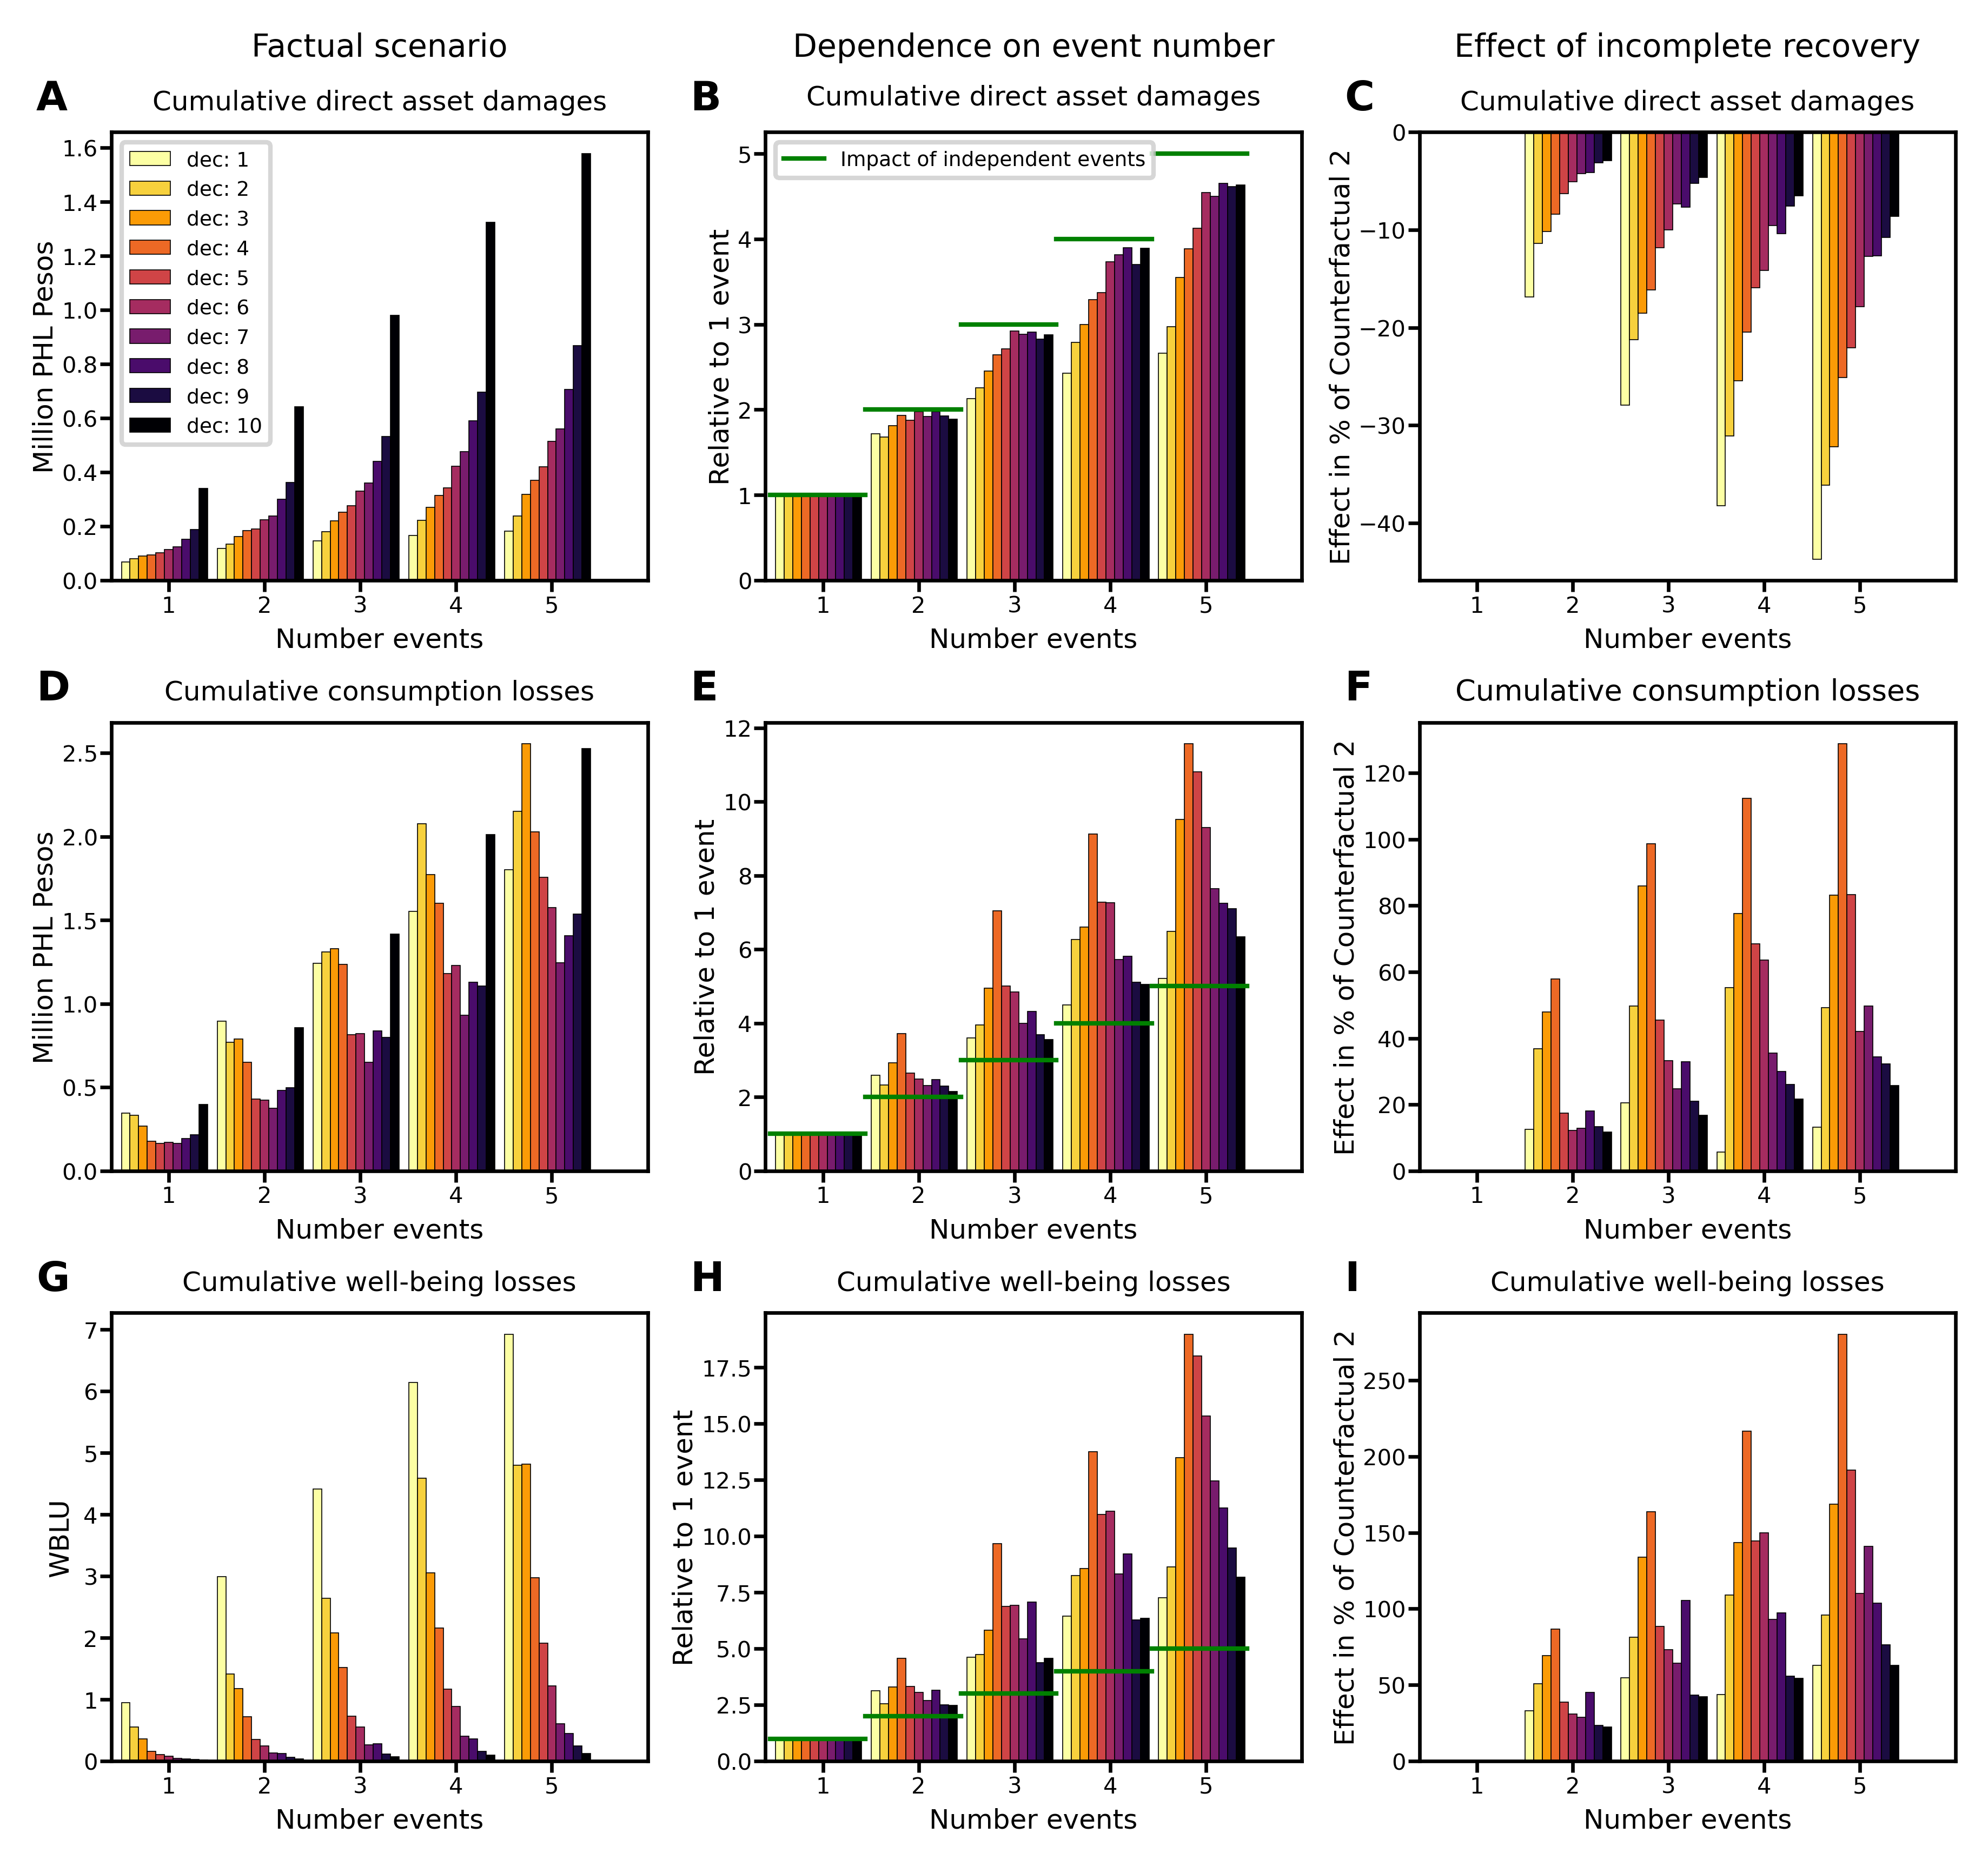

In [16]:
fig2 = plt.figure( figsize=(x_width, y_width), dpi=600)

gs = fig2.add_gridspec(25, 32, wspace=50, hspace=0.2, top=0.90, bottom= 0.05, left= 0.075, right=0.95)
fig2.patch.set_facecolor('white')

dist=np.arange(-0.45,0.45,0.09)

ax111=fig2.add_subplot(gs[0:25,0:10])
ax111.set_title('Factual scenario', fontsize=7, x=0.5, y=1.03)
ax111.axis('off')

ax222=fig2.add_subplot(gs[0:25,11:21])
ax222.set_title('Dependence on event number', fontsize=7, x=0.5, y=1.03)
ax222.axis('off')

ax333=fig2.add_subplot(gs[0:25,22:32])
ax333.set_title('Effect of incomplete recovery', fontsize=7, x=0.5, y=1.03)
ax333.axis('off')

ax1=fig2.add_subplot(gs[0:7,0:10])
ax1.text(-0.14, 1.05, 'A', transform=ax1.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax1.bar(np.arange(1,6)+dist[i],keff.iloc[i,:]/1000000, label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2)
    
ax1.legend(fontsize=4.5, loc='best')
ax1.set_xticks(np.arange(1,6))

ax1.set_title('Cumulative direct asset damages', fontsize=6, x=0.5, y=0.99)
ax1.set_xlim([0.4,6.0])
ax1.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax1.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax1.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax1.set_ylabel('Million PHL Pesos', fontsize=6, labelpad=0.8)

ax6=fig2.add_subplot(gs[0:7,11:21])
ax6.text(-0.14, 1.05, 'B', transform=ax6.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax6.bar(np.arange(1,6)+dist[i],keff_diff_ev.iloc[i], width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2)


ax6.set_xticks(np.arange(1,6))
#ax6.xaxis.tick_top() # x axis on top
#ax6.xaxis.set_label_position('top')
ax6.set_title('Cumulative direct asset damages', fontsize=6)

ax6.set_xlim([0.4,6.0])

ax6.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax6.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax6.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax6.set_ylabel('Relative to 1 event', fontsize=6, labelpad=0.8)

start=0.00847457627118644
step=0.17796610169491525
for i in np.arange(1,6):
    st=start+((i-1) *step)
    if i ==1:
        ax6.axhline(xmin=st, xmax=st+step, y=i, color='green', linestyle='-', linewidth=1, label='Impact of independent events')
    else:
        ax6.axhline(xmin=st, xmax=st+step, y=i, color='green', linestyle='-', linewidth=1)
ax6.legend(fontsize=4.5, loc='best')

ax2=fig2.add_subplot(gs[9:16,0:10])
ax2.text(-0.14, 1.05, 'D', transform=ax2.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax2.bar(np.arange(1,6)+dist[i],cons.iloc[i,:]/1000000, label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2)

ax2.set_title('Cumulative consumption losses', fontsize=6, x=0.5, y=0.99)
#ax2.legend(fontsize=4.5, loc='best')
ax2.set_xticks(np.arange(1,6))
ax2.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax2.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax2.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax2.set_ylabel('Million PHL Pesos', fontsize=6, labelpad=0.8)
ax2.set_xlim([0.4,6.0])

##
ax7=fig2.add_subplot(gs[9:16,11:21])
ax7.text(-0.14, 1.05, 'E', transform=ax7.transAxes, size=9, weight='bold')
#ax7.text(-0.14, 1.04, 'e', transform=ax7.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax7.bar(np.arange(1,6)+dist[i],cons_diff_ev.iloc[i], label='dec: ' + str(dec), width=0.09, 
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2)
ax7.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax7.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax7.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax7.set_ylabel('Relative to 1 event', fontsize=6, labelpad=0.8)

ax7.set_xticks(np.arange(6))

ax7.set_xlim([0.4,6.0])
start=0.00847457627118644
step=0.17796610169491525
for i in np.arange(1,6):
    st=start+((i-1) *step)
    ax7.axhline(xmin=st, xmax=st+step, y=i, color='green', linestyle='-', linewidth=1)

ax4=fig2.add_subplot(gs[18:25,0:10])
dist_1=np.arange(-0.42,0.42,0.12)
dist_2=np.arange(-0.45,0.45, 0.3)
#ax4.xaxis.tick_top() # x axis on top
#ax4.xaxis.set_label_position('top')
ax4.set_xticks(np.arange(6))
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax4.bar(np.arange(1,6)+dist[i],wb.iloc[i,:], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2)
#ax4.set_ylim([-7,0])
#ax4.legend(fontsize=4.5, loc='lower left')

ax4.set_xlim([0.4,6.0])

ax4.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax4.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax4.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax4.set_ylabel('WBLU', fontsize=6, labelpad=2.2)

ax4.set_title('Cumulative well-being losses', fontsize=6, x=0.5, y=0.99)
ax4.text(-0.14, 1.05, 'G', transform=ax4.transAxes, size=9, weight='bold')

ax8=fig2.add_subplot(gs[18:25,11:21])
#ax8.text(-0.14, 1.1, 'f', transform=ax8.transAxes, size=9, weight='bold')
ax8.text(-0.14, 1.05, 'H', transform=ax8.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax8.bar(np.arange(1,6)+dist[i],wb_diff_ev.iloc[i], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2)
#ax8.xaxis.tick_top() # x axis on top
#ax8.xaxis.set_label_position('top')
ax8.set_xticks(np.arange(1,6))
ax8.set_title('Cumulative well-being losses', fontsize=6, x=0.5, y=0.99)
ax8.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax8.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax8.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax8.set_ylabel('Relative to 1 event', fontsize=6, labelpad=0.8)
ax8.set_xlim([0.4,6.0])
step=0.17796610169491525
start=0.00847457627118644
for i in np.arange(1,6):
    st=start+((i-1) *step)
    ax8.axhline(xmin=st, xmax=st+step, y=i, color='green', linestyle='-', linewidth=1)



ax11=fig2.add_subplot(gs[0:7,22:32])
ax11.text(-0.14, 1.05, 'C', transform=ax11.transAxes, size=9, weight='bold')
#ax11.text(-0.14, 1.05, 'g', transform=ax11.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax11.bar(np.arange(1,6)+dist[i],keff_rel.iloc[i,:], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2)
    
ax11.set_xticks(np.arange(1,6))
ax11.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax11.set_ylabel('Effect in % of Counterfactual 2', fontsize=6, labelpad=0.8)

ax11.set_title('Cumulative direct asset damages', fontsize=6, x=0.5, y=0.99)
ax11.tick_params(axis='both', which='major', labelsize=5)
ax11.set_xlim([0.4,6.0])
ax11.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax11.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)


ax22=fig2.add_subplot(gs[9:16,22:32])
ax22.text(-0.14, 1.05, 'F', transform=ax22.transAxes, size=9, weight='bold')
#ax22.text(-0.14, 1.05, 'h', transform=ax22.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax22.bar(np.arange(1,6)+dist[i],cons_rel.iloc[i,:], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2)
    
ax22.set_xticks(np.arange(1,6))
ax22.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax22.set_ylabel('Effect in % of Counterfactual 2', fontsize=6, labelpad=0.8)

ax22.set_title('Cumulative consumption losses', fontsize=6.5, x=0.5, y=0.99)
ax22.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax22.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax22.set_xlim([0.4,6.0])



ax33=fig2.add_subplot(gs[18:25,22:32])
ax33.text(-0.14, 1.05, 'I', transform=ax33.transAxes, size=9, weight='bold')
#ax33.text(-0.14, 1.05, 'i', transform=ax33.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax33.bar(np.arange(1,6)+dist[i],wb_rel.iloc[i,:], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2)
    
ax33.set_xticks(np.arange(1,6))
ax33.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax33.set_ylabel('Effect in % of Counterfactual 2', fontsize=6, labelpad=0.8)

ax33.set_title('Cumulative well-being losses', fontsize=6, x=0.5, y=0.99)
ax33.tick_params(axis='both', which='major', labelsize=5)
ax33.set_xlim([0.4,6.0])
ax33.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax33.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
plt.tight_layout()
plt.savefig('/home/insauer/projects/revisions_iScience/final_resubmission/main_figures/figure_5.pdf')

In [17]:
wb_wo_sm=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/wb_factual_mean.csv')
wb_rel_wo_sm=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/wb_rel_mean.csv')
cons_wo_sm=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/cons_factual_mean.csv')
cons_rel_wo_sm=pd.read_csv('/home/insauer/projects/revisions_iScience/analyse_results/data/revisions_seeds/cons_rel_mean.csv')

In [18]:
cons_wo_sm=cons_wo_sm.iloc[:,2:7]
wb_wo_sm=wb_wo_sm.iloc[:,2:7]

In [19]:
cons_rel_wo_sm=cons_rel_wo_sm.iloc[:,2:7]
wb_rel_wo_sm=wb_rel_wo_sm.iloc[:,2:7]

In [20]:
deciles=np.arange(1,11)

In [21]:
cons_diff_ev_wo_sm = cons_wo_sm.divide(cons_wo_sm.iloc[:,0], axis='rows')
wb_diff_ev_wo_sm = wb_wo_sm.divide(wb_wo_sm.iloc[:,0], axis='rows')

/tmp/ipykernel_5556/3061761816.py:237: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


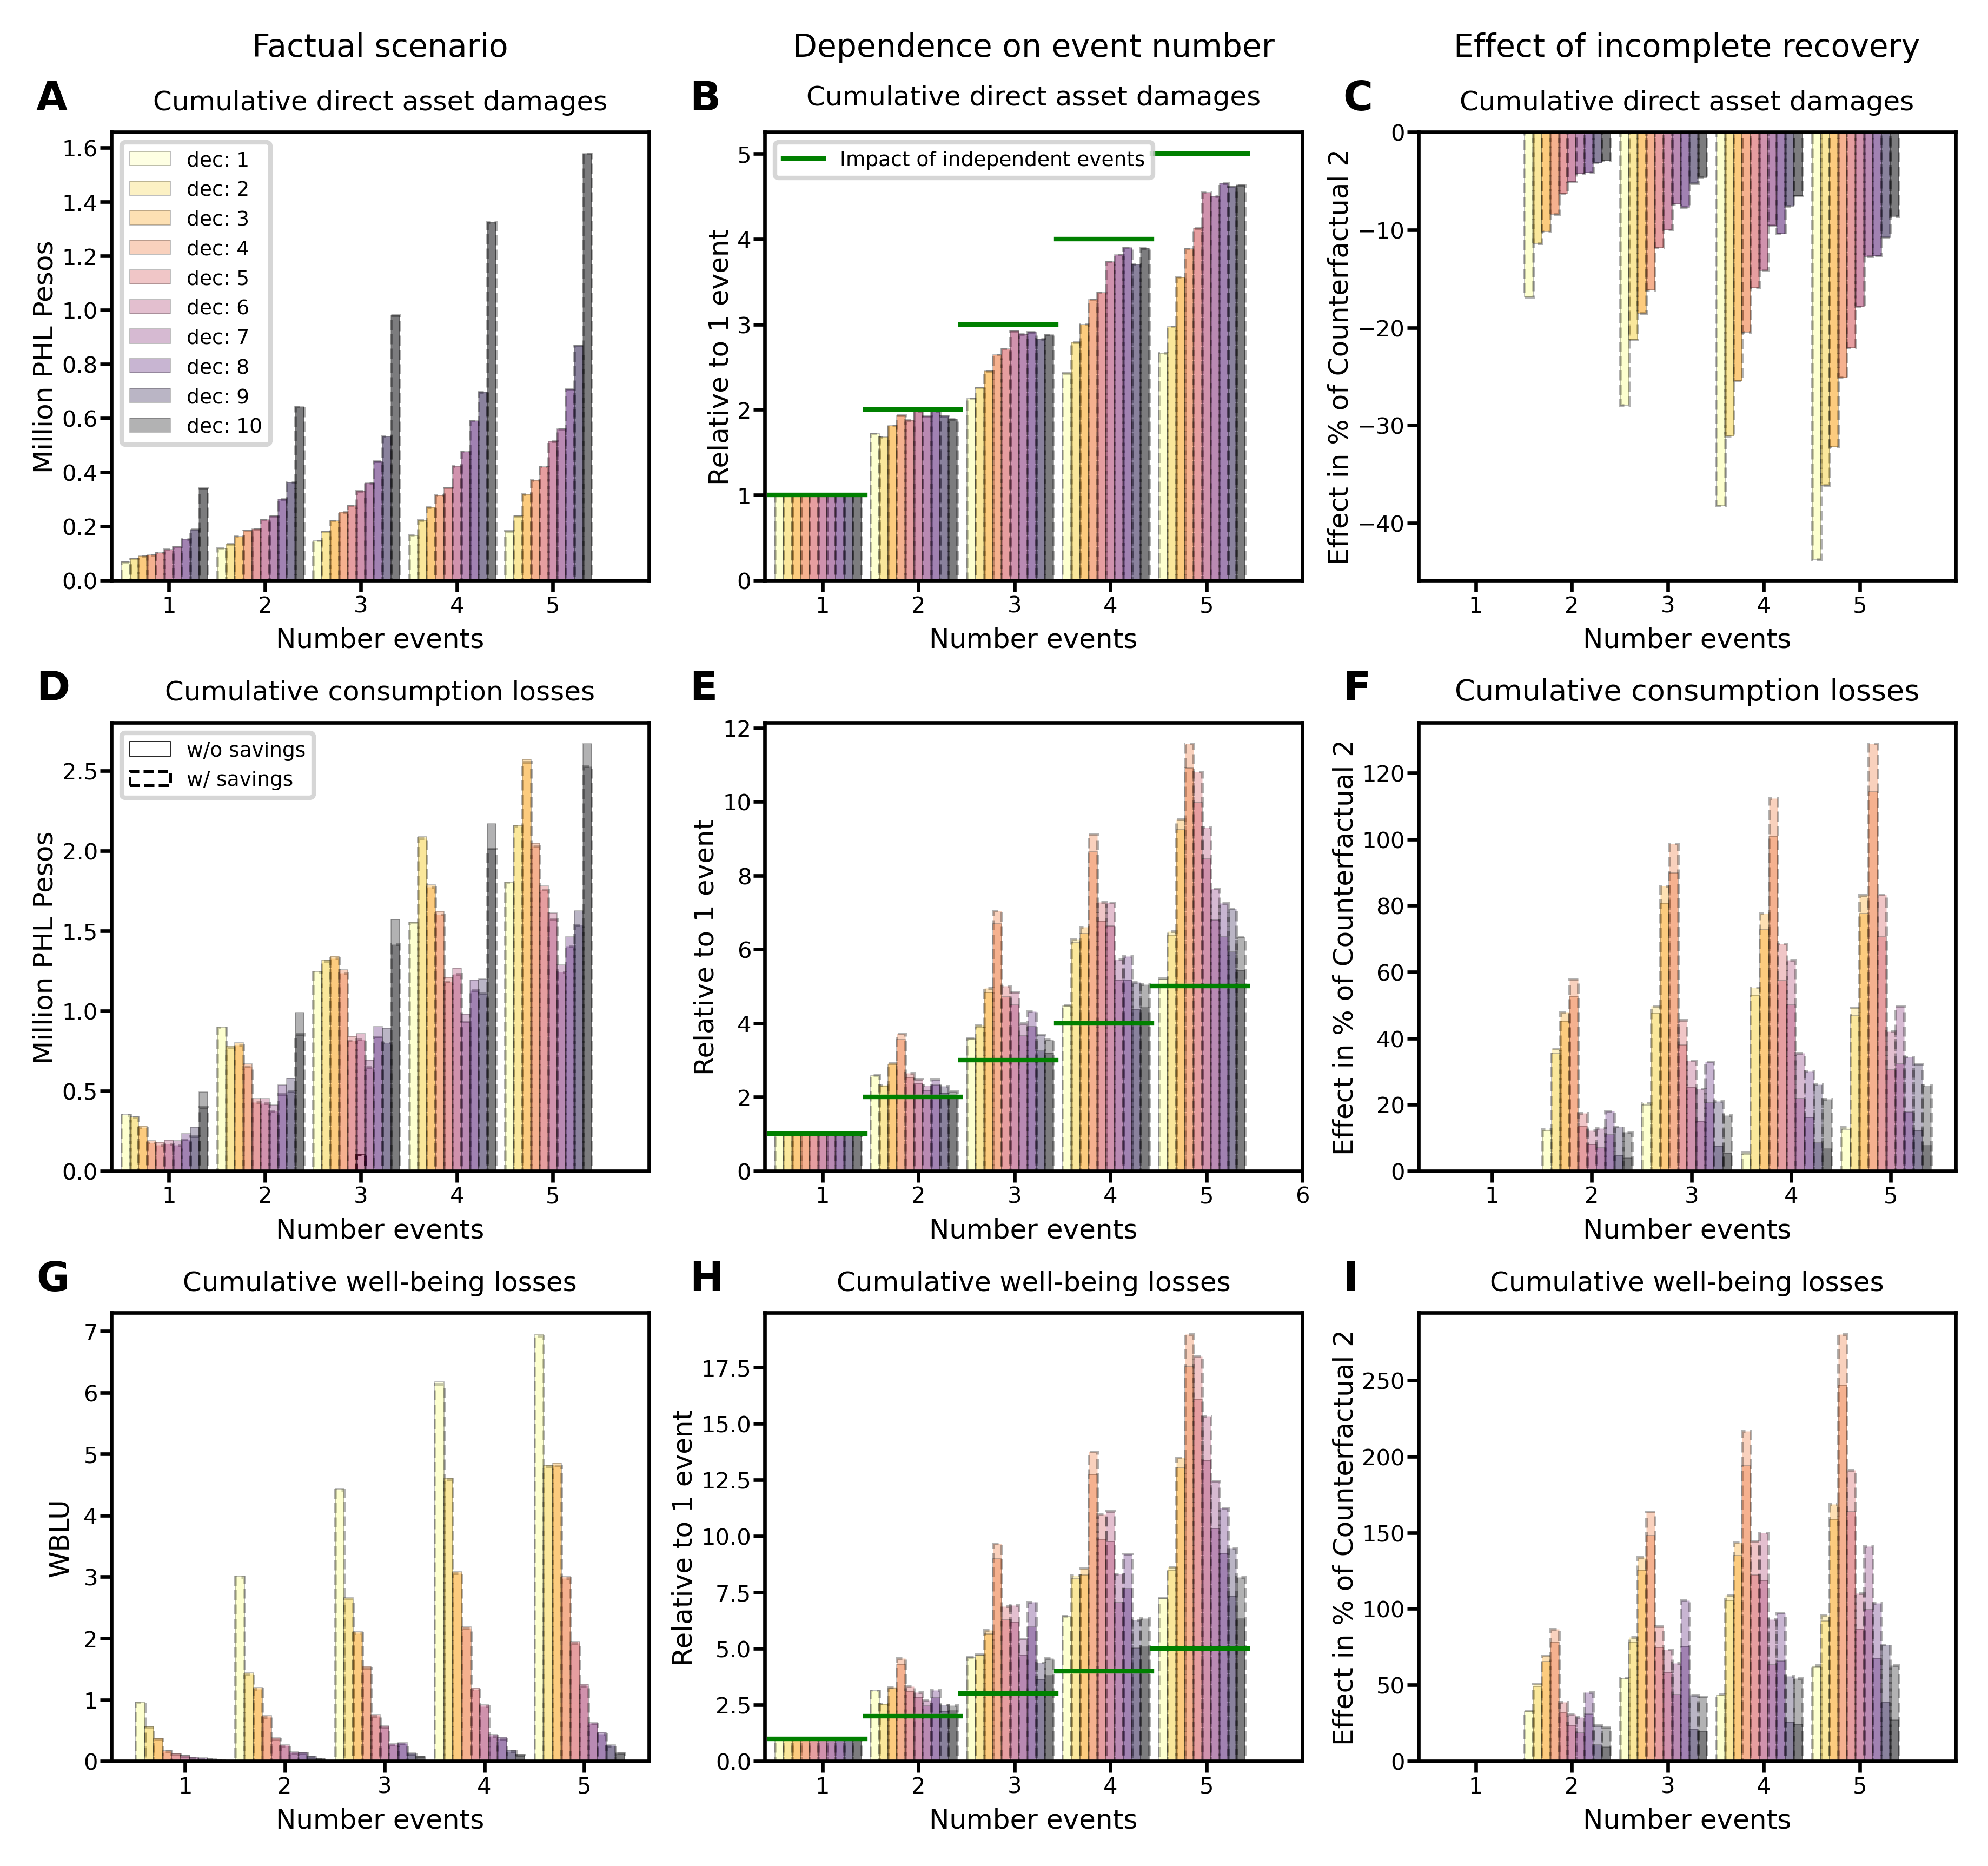

In [22]:
fig2 = plt.figure( figsize=(x_width, y_width), dpi=600)

gs = fig2.add_gridspec(25, 32, wspace=20, hspace=0.2, top=0.90, bottom= 0.05, left= 0.075, right=0.95)
fig2.patch.set_facecolor('white')

dist=np.arange(-0.45,0.45,0.09)

ax111=fig2.add_subplot(gs[0:25,0:10])
ax111.set_title('Factual scenario', fontsize=7, x=0.5, y=1.03)
ax111.axis('off')

ax222=fig2.add_subplot(gs[0:25,11:21])
ax222.set_title('Dependence on event number', fontsize=7, x=0.5, y=1.03)
ax222.axis('off')

ax333=fig2.add_subplot(gs[0:25,22:32])
ax333.set_title('Effect of incomplete recovery', fontsize=7, x=0.5, y=1.03)
ax333.axis('off')

ax1=fig2.add_subplot(gs[0:7,0:10])
ax1.text(-0.14, 1.05, 'A', transform=ax1.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax1.bar(np.arange(1,6)+dist[i],keff.iloc[i,:]/1000000, width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.6, alpha=0.3, linestyle='--')
    ax1.bar(np.arange(1,6)+dist[i],keff.iloc[i,:]/1000000, label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2, alpha=0.3)
    
ax1.legend(fontsize=4.5, loc='best')
ax1.set_xticks(np.arange(1,6))
ax1.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax1.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax1.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax1.set_ylabel('Million PHL Pesos', fontsize=6, labelpad=0.8)

ax1.set_title('Cumulative direct asset damages', fontsize=6, x=0.5, y=0.99)

ax1.set_xlim([0.4,6.0])




ax6=fig2.add_subplot(gs[0:7,11:21])
ax6.text(-0.14, 1.05, 'B', transform=ax6.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax6.bar(np.arange(1,6)+dist[i],keff_diff_ev.iloc[i], width=0.09, linestyle='--',
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.6, alpha=0.3)
    ax6.bar(np.arange(1,6)+dist[i],keff_diff_ev.iloc[i], width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2, alpha=0.3)


ax6.set_xticks(np.arange(1,6))
ax6.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax6.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax6.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax6.set_ylabel('Relative to 1 event', fontsize=6, labelpad=0.8)
ax6.set_title('Cumulative direct asset damages', fontsize=6)

ax6.set_xlim([0.4,6.0])

start=0.00847457627118644
step=0.17796610169491525
for i in np.arange(1,6):
    st=start+((i-1) *step)
    if i ==1:
        ax6.axhline(xmin=st, xmax=st+step, y=i, color='green', linestyle='-', linewidth=1, label='Impact of independent events')
    else:
        ax6.axhline(xmin=st, xmax=st+step, y=i, color='green', linestyle='-', linewidth=1)
ax6.legend(fontsize=4.5, loc='best')

ax2=fig2.add_subplot(gs[9:16,0:10])
ax2.text(-0.14, 1.05, 'D', transform=ax2.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    if i==0:
        ax2.bar(3, 0.1, width=0.09, label='w/o savings', color='white', edgecolor='k', linewidth=0.2)
        ax2.bar(3, 0.1, width=0.09, label='w/ savings', color='white', edgecolor='k', linewidth=0.6, linestyle='--')
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax2.bar(np.arange(1,6)+dist[i],cons.iloc[i,:]/1000000, width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.6, alpha=0.3, linestyle='--')
    ax2.bar(np.arange(1,6)+dist[i],cons_wo_sm.iloc[i,:]/1000000, width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2, alpha=0.3)

ax2.set_title('Cumulative consumption losses', fontsize=6, x=0.5, y=0.99)
ax2.legend(fontsize=4.5, loc='best')
ax2.set_xticks(np.arange(1,6))
ax2.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax2.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax2.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax2.set_ylabel('Million PHL Pesos', fontsize=6, labelpad=0.8)
ax2.set_xlim([0.4,6.0])

##
ax7=fig2.add_subplot(gs[9:16,11:21])
ax7.text(-0.14, 1.05, 'E', transform=ax7.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax7.bar(np.arange(1,6)+dist[i],cons_diff_ev.iloc[i], label='dec: ' + str(dec), width=0.09, 
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.6, alpha=0.3, linestyle='--')
    ax7.bar(np.arange(1,6)+dist[i],cons_diff_ev_wo_sm.iloc[i], label='dec: ' + str(dec), width=0.09, 
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2, alpha=0.3)
ax7.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax7.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax7.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax7.set_ylabel('Relative to 1 event', fontsize=6, labelpad=0.8)
ax7.set_xlim([0.4,6.0])
start=0.00847457627118644
step=0.17796610169491525
for i in np.arange(1,6):
    st=start+((i-1) *step)
    ax7.axhline(xmin=st, xmax=st+step, y=i, color='green', linestyle='-', linewidth=1)

ax4=fig2.add_subplot(gs[18:25,0:10])
dist_1=np.arange(-0.42,0.42,0.12)
dist_2=np.arange(-0.45,0.45, 0.3)
#ax4.xaxis.tick_top() # x axis on top
#ax4.xaxis.set_label_position('top')
ax4.set_xticks(np.arange(6))
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax4.bar(np.arange(1,6)+dist[i],wb.iloc[i,:], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.6, alpha=0.3, linestyle='--')
    ax4.bar(np.arange(1,6)+dist[i],wb_wo_sm.iloc[i,:], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2, alpha=0.3)
#ax4.set_ylim([-7,0])
#ax4.legend(fontsize=4.5, loc='lower left')

ax4.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax4.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax4.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax4.set_ylabel('WBLU', fontsize=6, labelpad=2.2)

ax4.set_title('Cumulative well-being losses', fontsize=6, x=0.5, y=0.99)
ax4.text(-0.14, 1.05, 'G', transform=ax4.transAxes, size=9, weight='bold')

ax8=fig2.add_subplot(gs[18:25,11:21])
ax8.text(-0.14, 1.05, 'H', transform=ax8.transAxes, size=9, weight='bold')

for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax8.bar(np.arange(1,6)+dist[i],wb_diff_ev.iloc[i], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.6, alpha=0.3, linestyle='--')
    ax8.bar(np.arange(1,6)+dist[i],wb_diff_ev_wo_sm.iloc[i], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2, alpha=0.3)
#ax8.xaxis.tick_top() # x axis on top
#ax8.xaxis.set_label_position('top')
ax8.set_xticks(np.arange(1,6))
ax8.set_title('Cumulative well-being losses', fontsize=6, x=0.5, y=0.99)
ax8.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax8.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
ax8.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax8.set_ylabel('Relative to 1 event', fontsize=6, labelpad=0.8)
ax8.set_xlim([0.4,6.0])
step=0.17796610169491525
start=0.00847457627118644
for i in np.arange(1,6):
    st=start+((i-1) *step)
    ax8.axhline(xmin=st, xmax=st+step, y=i, color='green', linestyle='-', linewidth=1)



ax11=fig2.add_subplot(gs[0:7,22:32])
ax11.text(-0.14, 1.05, 'C', transform=ax11.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax11.bar(np.arange(1,6)+dist[i],keff_rel.iloc[i,:], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.6, alpha=0.3, linestyle='--')
    ax11.bar(np.arange(1,6)+dist[i],keff_rel.iloc[i,:], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2, alpha=0.3)
    
ax11.set_xticks(np.arange(1,6))
ax11.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax11.set_ylabel('Effect in % of Counterfactual 2', fontsize=6, labelpad=0.8)

ax11.set_title('Cumulative direct asset damages', fontsize=6, x=0.5, y=0.99)
ax11.tick_params(axis='both', which='major', labelsize=5)
ax11.set_xlim([0.4,6.0])
ax11.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax11.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)


ax22=fig2.add_subplot(gs[9:16,22:32])
ax22.text(-0.14, 1.05, 'F', transform=ax22.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax22.bar(np.arange(1,6)+dist[i],cons_rel.iloc[i,:], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.6, alpha=0.3, linestyle='--')
    ax22.bar(np.arange(1,6)+dist[i],cons_rel_wo_sm.iloc[i,:], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2, alpha=0.3)
    
ax22.set_xticks(np.arange(1,6))
ax22.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax22.set_ylabel('Effect in % of Counterfactual 2', fontsize=6, labelpad=0.8)

ax22.set_title('Cumulative consumption losses', fontsize=6.5, x=0.5, y=0.99)
ax22.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax22.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)



ax33=fig2.add_subplot(gs[18:25,22:32])
ax33.text(-0.14, 1.05, 'I', transform=ax33.transAxes, size=9, weight='bold')
for i,dec in enumerate(deciles):
    clist=[]
    for l in np.arange(1,6):
        clist.append(cmap(col_dec[i]))
    ax33.bar(np.arange(1,6)+dist[i],wb_rel.iloc[i,:], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.6, alpha=0.3, linestyle='--')
    ax33.bar(np.arange(1,6)+dist[i],wb_rel_wo_sm.iloc[i,:], label='dec: ' + str(dec), width=0.09,
            color=cmap(col_dec[i]), edgecolor='k', linewidth=0.2, alpha=0.3)
    
ax33.set_xticks(np.arange(1,6))
ax33.set_xlabel('Number events', fontsize=6, labelpad=2.2)
ax33.set_ylabel('Effect in % of Counterfactual 2', fontsize=6, labelpad=0.8)

ax33.set_title('Cumulative well-being losses', fontsize=6, x=0.5, y=0.99)
ax33.tick_params(axis='both', which='major', labelsize=5)
ax33.set_xlim([0.4,6.0])
ax33.tick_params(axis='y', which='major', labelsize=5, length=2.5, pad=0.5)
ax33.tick_params(axis='x', which='major', labelsize=5, length=2.5, pad=0.8)
plt.tight_layout()
plt.savefig('/home/insauer/projects/revisions_iScience/final_resubmission/supplementary_figures/fig5_sv.pdf')
plt.savefig('/home/insauer/projects/revisions_iScience/final_resubmission/supplementary_figures/fig5_sv.png')